# Inference at high SNR

This notebook is to make sure anyone can do inference and produce the figures

In [1]:
import numpy as np
from utils_h5 import H5Loader
from astroNN.models import load_folder

# Load the dataset testing data
loader = H5Loader("_highsnr_test")
loader.load_combined = True  # load combined spectra
loader.load_err = False
# load the correct entry with correct order from ApogeeBCNNcensored
loader.target = [
    "teff",
    "logg",
    "C",
    "C1",
    "N",
    "O",
    "Na",
    "Mg",
    "Al",
    "Si",
    "P",
    "S",
    "K",
    "Ca",
    "Ti",
    "Ti2",
    "V",
    "Cr",
    "Mn",
    "Fe",
    "Co",
    "Ni",
]
x, y = loader.load()

# load RA, DEC, SNR entry
RA_combined = loader.load_entry("RA")
DEC_combined = loader.load_entry("DEC")
SNR_combined = loader.load_entry("SNR")

# Load model and do inference
bcnn = load_folder("astroNN_0617_run001")
bcnn.mc_num = 100
pred, pred_err = bcnn.test(x)

Loaded astroNN model, model type: Bayesian Convolutional Neural Network -> ApogeeBCNNCensored
Starting Dropout Variational Inference
Completed Dropout Variational Inference with 100 forward passes, 114.09s elapsed


### Isochrones from http://stev.oapd.inaf.it/cgi-bin/cmd_3.0

**Configuration:**
- PARSEC v1.2S + COLIBRI PR16
- Gaia DR2 + Tycho2 + 2MASS (all Veggamags)
- NBC as described on Chen et al. (2014), based on PHOENIX BT-Settl for Teff<4000 K, and on ATLAS9 ODFNEW otherwise or on
- Aringer et al. (2009) (updated to include new spectra from Aringer et al. (2016)) 
- No dust
- Single isochrone of t = $5.0x10^{9}$ yr, and $[Z/H]$ = $0.25$, $-0.25$, $-0.75$, $-1.75$

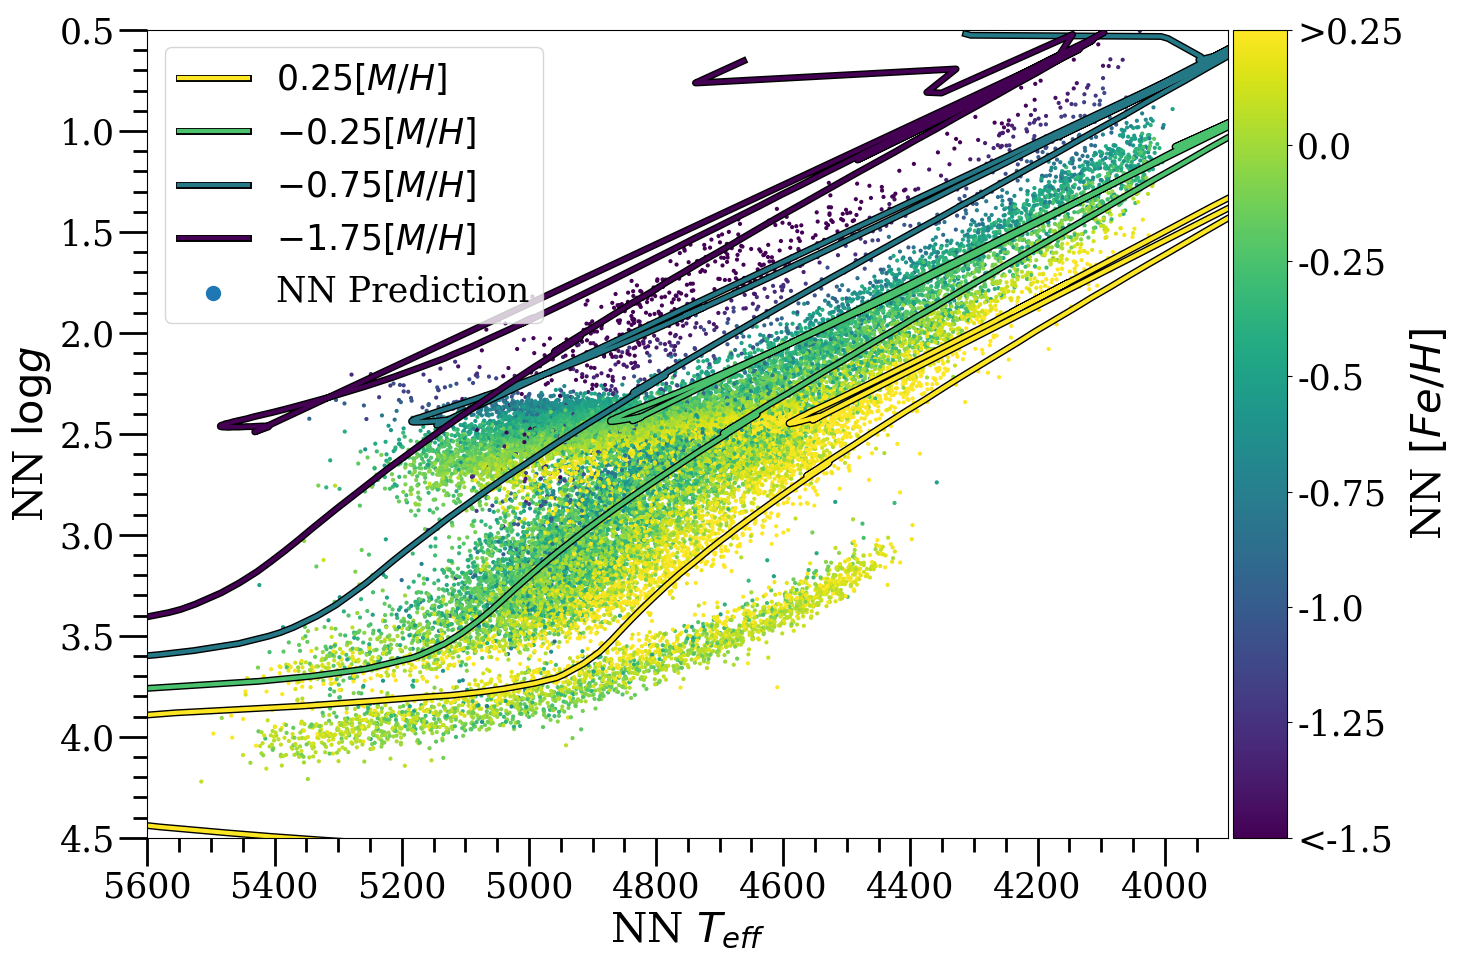

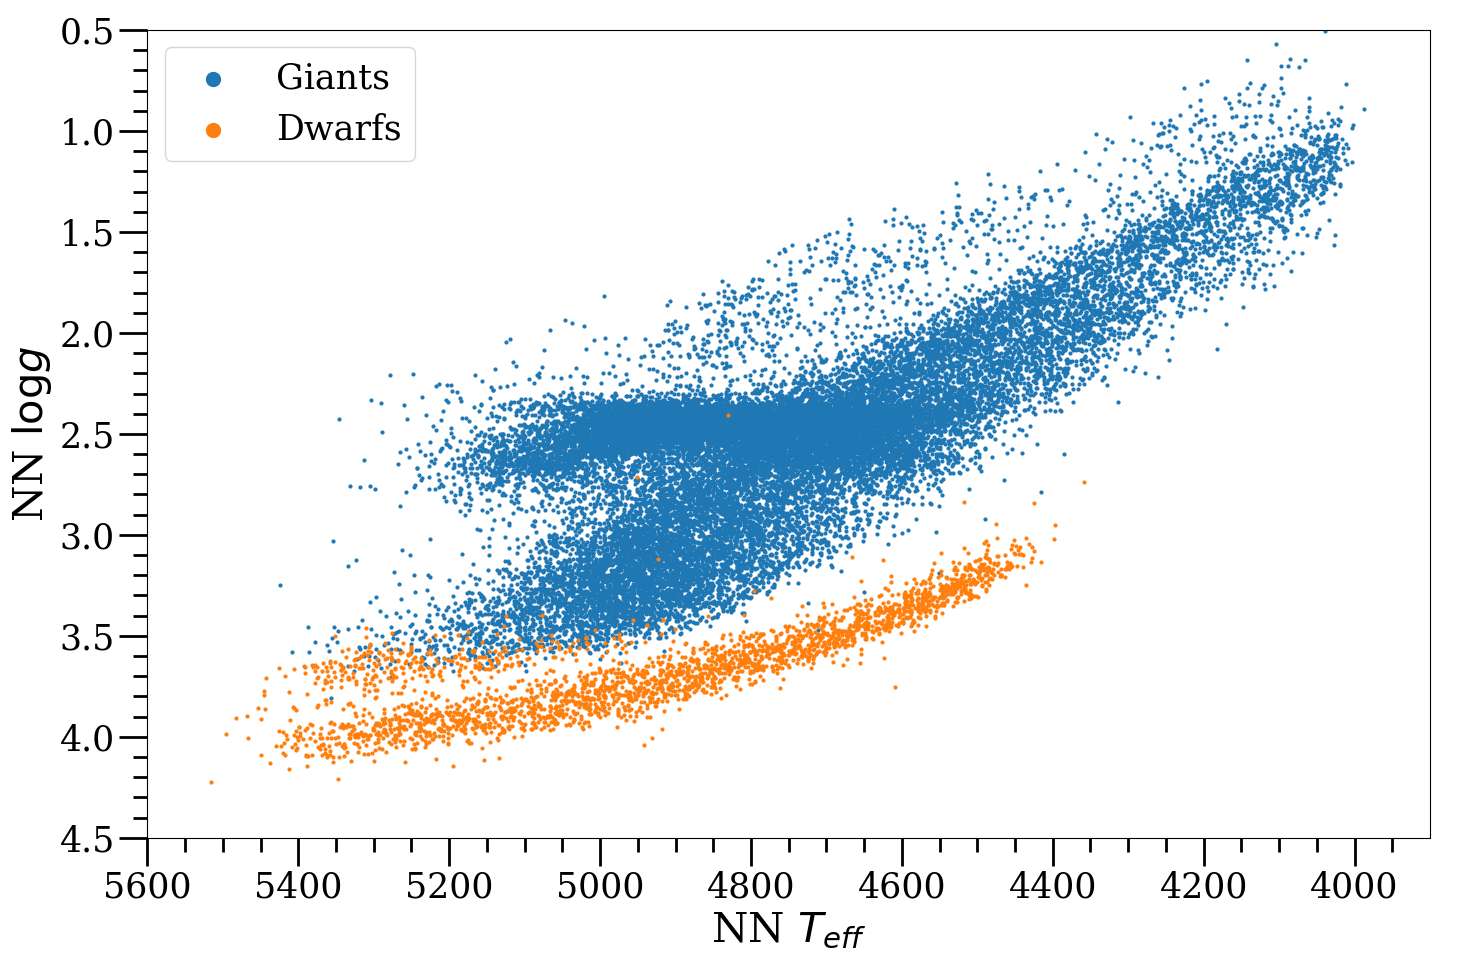

In [9]:
%matplotlib inline
import numpy as np
import pylab as plt
import astropy.io.ascii
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patheffects as pe

plt.rc("font", **{"family": "serif", "weight": "medium", "size": 20})

# load +0.25Z
data_p025 = astropy.io.ascii.read("isochrones\z_p025.dat")
teff_isochrone_p025 = 10 ** data_p025["col6"]
logg_isochrone_p025 = data_p025["col7"]
good_idx_p025 = (logg_isochrone_p025 > 0.5) & (teff_isochrone_p025 < 6200)

# load -0.25Z
data_n025 = astropy.io.ascii.read("isochrones\z_n025.dat")
teff_isochrone_n025 = 10 ** data_n025["col6"]
logg_isochrone_n025 = data_n025["col7"]
good_idx_n025 = (logg_isochrone_n025 > 0.5) & (teff_isochrone_n025 < 6200)

# load -0.75Z
data_n075 = astropy.io.ascii.read("isochrones\z_n075.dat")
teff_isochrone_n075 = 10 ** data_n075["col6"]
logg_isochrone_n075 = data_n075["col7"]
good_idx_n075 = (logg_isochrone_n075 > 0.5) & (teff_isochrone_n075 < 6200)

# load -1.75Z
data_n175 = astropy.io.ascii.read("isochrones\z_n175.dat")
teff_isochrone_n175 = 10 ** data_n175["col6"]
logg_isochrone_n175 = data_n175["col7"]
good_idx_n175 = (logg_isochrone_n175 > 0.5) & (teff_isochrone_n175 < 6200)

fig = plt.figure(figsize=(15, 10), dpi=100)
ax = plt.gca()
plt.scatter(
    pred[:, 0],
    pred[:, 1],
    s=4.0,
    c=np.clip(pred[:, 19], -1.5, 0.25),
    rasterized=True,
    label=f"NN Prediction",
)
# screenshot and use PhotoShop to find the right color in hex
plt.plot(
    teff_isochrone_p025[good_idx_p025],
    logg_isochrone_p025[good_idx_p025],
    lw=3.0,
    c="#fde725",
    label=r"$0.25 [M/H]$",
    path_effects=[pe.Stroke(linewidth=5, foreground="k"), pe.Normal()],
)
plt.plot(
    teff_isochrone_n025[good_idx_n025],
    logg_isochrone_n025[good_idx_n025],
    lw=3.0,
    c="#4ac16d",
    label=r"$-0.25 [M/H]$",
    path_effects=[pe.Stroke(linewidth=5, foreground="k"), pe.Normal()],
)
plt.plot(
    teff_isochrone_n075[good_idx_n075],
    logg_isochrone_n075[good_idx_n075],
    lw=3.0,
    c="#247886",
    label=r"$-0.75 [M/H]$",
    path_effects=[pe.Stroke(linewidth=5, foreground="k"), pe.Normal()],
)
plt.plot(
    teff_isochrone_n175[good_idx_n175],
    logg_isochrone_n175[good_idx_n175],
    lw=3.0,
    c="#440154",
    label=r"$-1.75 [M/H]$",
    path_effects=[pe.Stroke(linewidth=5, foreground="k"), pe.Normal()],
)
plt.xlabel("NN " + "$T_{eff}$", fontsize=30)
plt.ylabel("NN " + "$\log{g}$", fontsize=30)
plt.xlim((3900.0, 5600))
plt.ylim((0.5, 4.5))
plt.legend(loc="best", fontsize=25, markerscale=5)
plt.minorticks_on()
plt.tick_params(labelsize=25, width=2, length=20, which="major")
plt.tick_params(width=2, length=10, which="minor")
ax.invert_xaxis()
ax.invert_yaxis()
# colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cax=cax, ticks=[-1.5, -1.25, -1.0, -0.75, -0.5, -0.25, 0.0, 0.25])
cbar.ax.set_yticklabels(
    ["<-1.5", "-1.25", "-1.0", "-0.75", "-0.5", "-0.25", "0.0", ">0.25"]
)
cbar.set_clim(vmin=-1.5, vmax=0.25)
cbar.ax.tick_params(labelsize=25)
cbar.set_label("NN " + "$[Fe/H]$", size=30)

plt.tight_layout()
plt.savefig("logg_teff_fe_isochrones.pdf")
plt.show()

# ==================plot giants and dwarfs=========================== #

fig = plt.figure(figsize=(15, 10), dpi=100)
ax = plt.gca()
plt.scatter(
    pred[:, 0][y[:, 1] != -9999.0],
    pred[:, 1][y[:, 1] != -9999.0],
    s=4.0,
    label=f"Giants",
)
plt.scatter(
    pred[:, 0][y[:, 1] == -9999.0],
    pred[:, 1][y[:, 1] == -9999.0],
    s=4.0,
    label=f"Dwarfs",
)
plt.xlabel("NN " + "$T_{eff}$", fontsize=30)
plt.ylabel("NN " + "$\log{g}$", fontsize=30)
plt.xlim((3900.0, 5600))
plt.ylim((0.5, 4.5))
plt.legend(loc="best", fontsize=25, markerscale=5)
plt.minorticks_on()
plt.tick_params(labelsize=25, width=2, length=20, which="major")
plt.tick_params(width=2, length=10, which="minor")
ax.invert_xaxis()
ax.invert_yaxis()
plt.tight_layout()
plt.show()

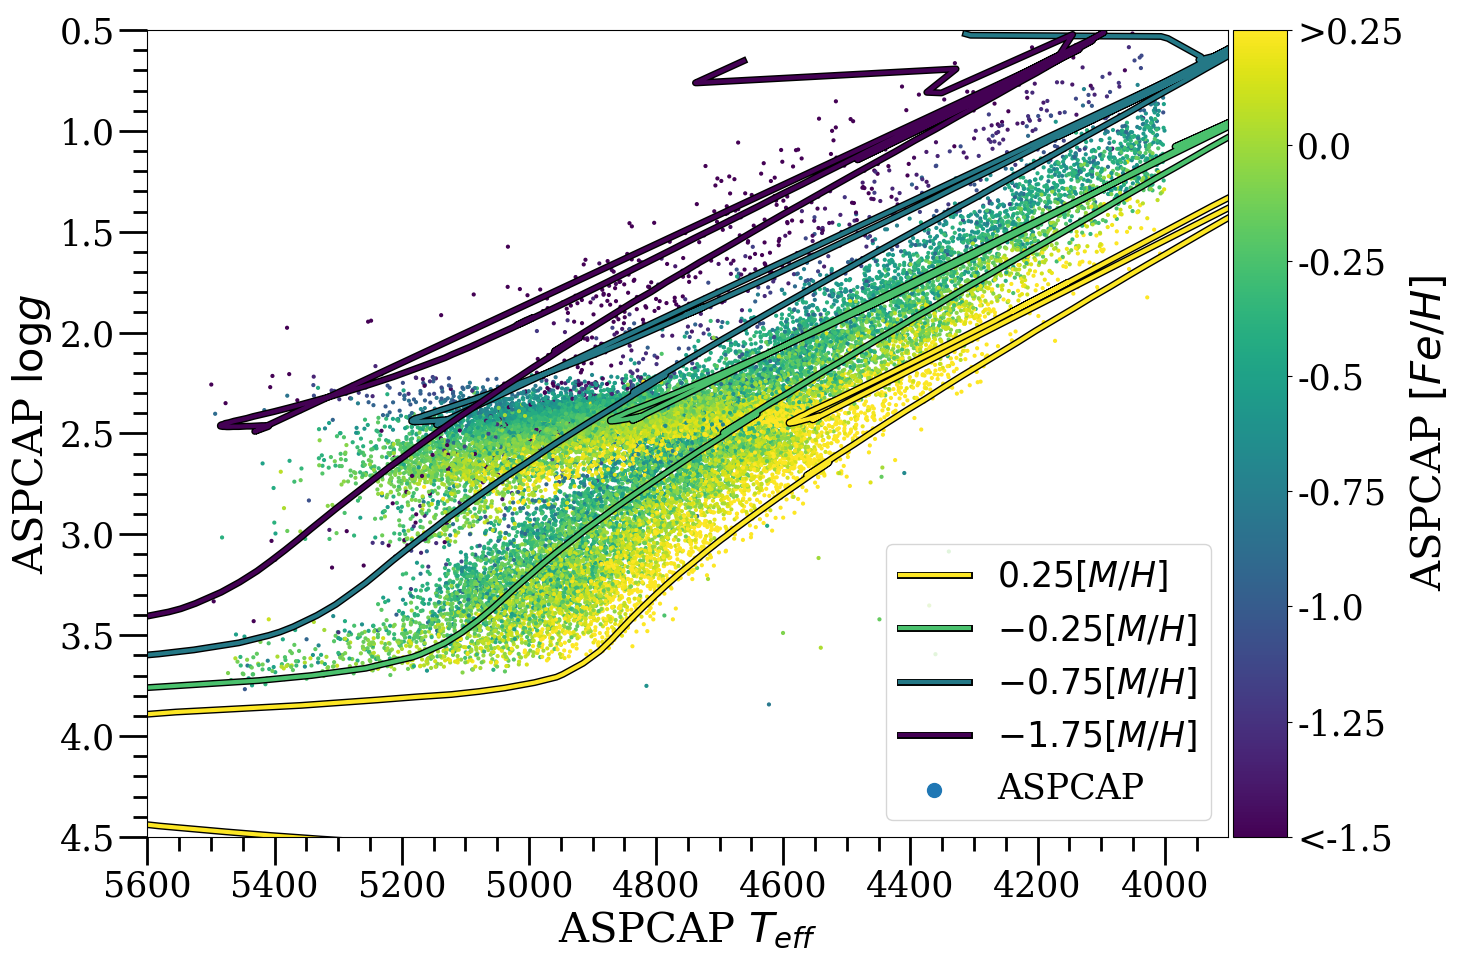

In [10]:
%matplotlib inline
import astropy.io.ascii
import numpy as np
import pylab as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rc("font", **{"family": "serif", "weight": "medium", "size": 20})

# load +0.25Z
data_p025 = astropy.io.ascii.read("isochrones\z_p025.dat")
teff_isochrone_p025 = 10 ** data_p025["col6"]
logg_isochrone_p025 = data_p025["col7"]
good_idx_p025 = (logg_isochrone_p025 > 0.5) & (teff_isochrone_p025 < 6200)

# load -0.25Z
data_n025 = astropy.io.ascii.read("isochrones\z_n025.dat")
teff_isochrone_n025 = 10 ** data_n025["col6"]
logg_isochrone_n025 = data_n025["col7"]
good_idx_n025 = (logg_isochrone_n025 > 0.5) & (teff_isochrone_n025 < 6200)

# load -0.75Z
data_n075 = astropy.io.ascii.read("isochrones\z_n075.dat")
teff_isochrone_n075 = 10 ** data_n075["col6"]
logg_isochrone_n075 = data_n075["col7"]
good_idx_n075 = (logg_isochrone_n075 > 0.5) & (teff_isochrone_n075 < 6200)

# load -1.75Z
data_n175 = astropy.io.ascii.read("isochrones\z_n175.dat")
teff_isochrone_n175 = 10 ** data_n175["col6"]
logg_isochrone_n175 = data_n175["col7"]
good_idx_n175 = (logg_isochrone_n175 > 0.5) & (teff_isochrone_n175 < 6200)

fig = plt.figure(figsize=(15, 10), dpi=100)
ax = plt.gca()
plt.scatter(
    y[:, 0][y[:, 19] != -9999.0],
    y[:, 1][y[:, 19] != -9999.0],
    s=4.0,
    c=np.clip(y[:, 19][y[:, 19] != -9999.0], -1.5, 0.25),
    label=f"ASPCAP",
)
# screenshot and use PhotoShop to find the right color in hex
plt.plot(
    teff_isochrone_p025[good_idx_p025],
    logg_isochrone_p025[good_idx_p025],
    lw=3.0,
    c="#fde725",
    label=r"$0.25 [M/H]$",
    path_effects=[pe.Stroke(linewidth=5, foreground="k"), pe.Normal()],
)
plt.plot(
    teff_isochrone_n025[good_idx_n025],
    logg_isochrone_n025[good_idx_n025],
    lw=3.0,
    c="#4ac16d",
    label=r"$-0.25 [M/H]$",
    path_effects=[pe.Stroke(linewidth=5, foreground="k"), pe.Normal()],
)
plt.plot(
    teff_isochrone_n075[good_idx_n075],
    logg_isochrone_n075[good_idx_n075],
    lw=3.0,
    c="#247886",
    label=r"$-0.75 [M/H]$",
    path_effects=[pe.Stroke(linewidth=5, foreground="k"), pe.Normal()],
)
plt.plot(
    teff_isochrone_n175[good_idx_n175],
    logg_isochrone_n175[good_idx_n175],
    lw=3.0,
    c="#440154",
    label=r"$-1.75 [M/H]$",
    path_effects=[pe.Stroke(linewidth=5, foreground="k"), pe.Normal()],
)
plt.xlabel("ASPCAP " + "$T_{eff}$", fontsize=30)
plt.ylabel("ASPCAP " + "$\log{g}$", fontsize=30)
plt.xlim((3900.0, 5600))
plt.ylim((0.5, 4.5))
plt.legend(loc="best", fontsize=25, markerscale=5)
plt.minorticks_on()
plt.tick_params(labelsize=25, width=2, length=20, which="major")
plt.tick_params(width=2, length=10, which="minor")
ax.invert_xaxis()
ax.invert_yaxis()
# colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cax=cax, ticks=[-1.5, -1.25, -1.0, -0.75, -0.5, -0.25, 0.0, 0.25])
cbar.ax.set_yticklabels(
    ["<-1.5", "-1.25", "-1.0", "-0.75", "-0.5", "-0.25", "0.0", ">0.25"]
)
cbar.set_clim(vmin=-1.5, vmax=0.25)
cbar.ax.tick_params(labelsize=25)
cbar.set_label("ASPCAP " + "$[Fe/H]$", size=30)

plt.tight_layout()
# plt.savefig('logg_teff_fe_isochrones.png')
plt.show()

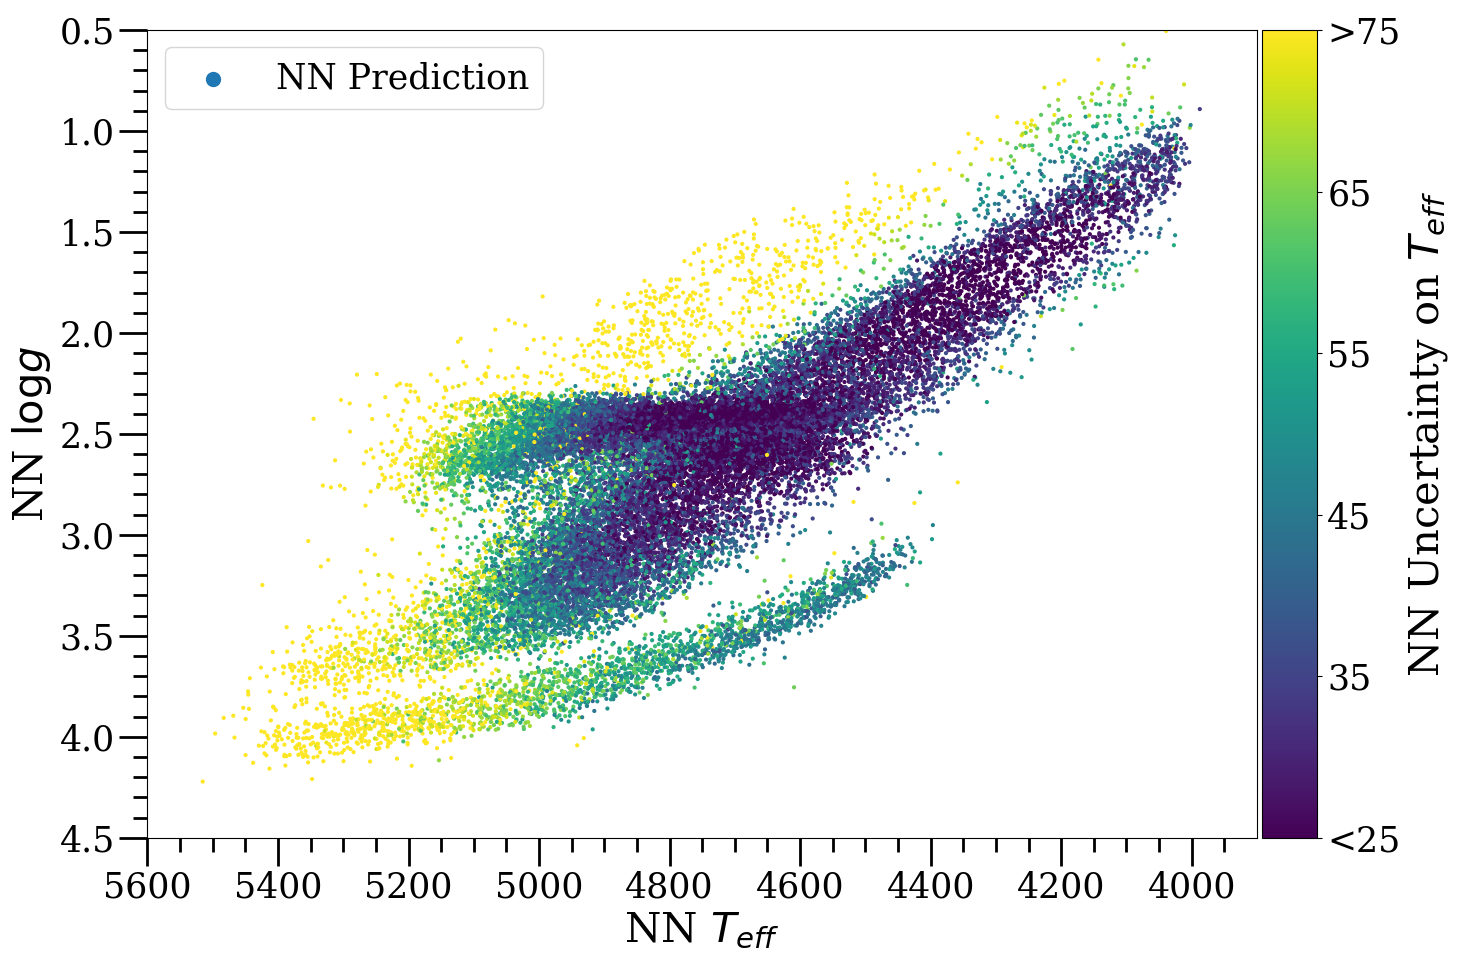

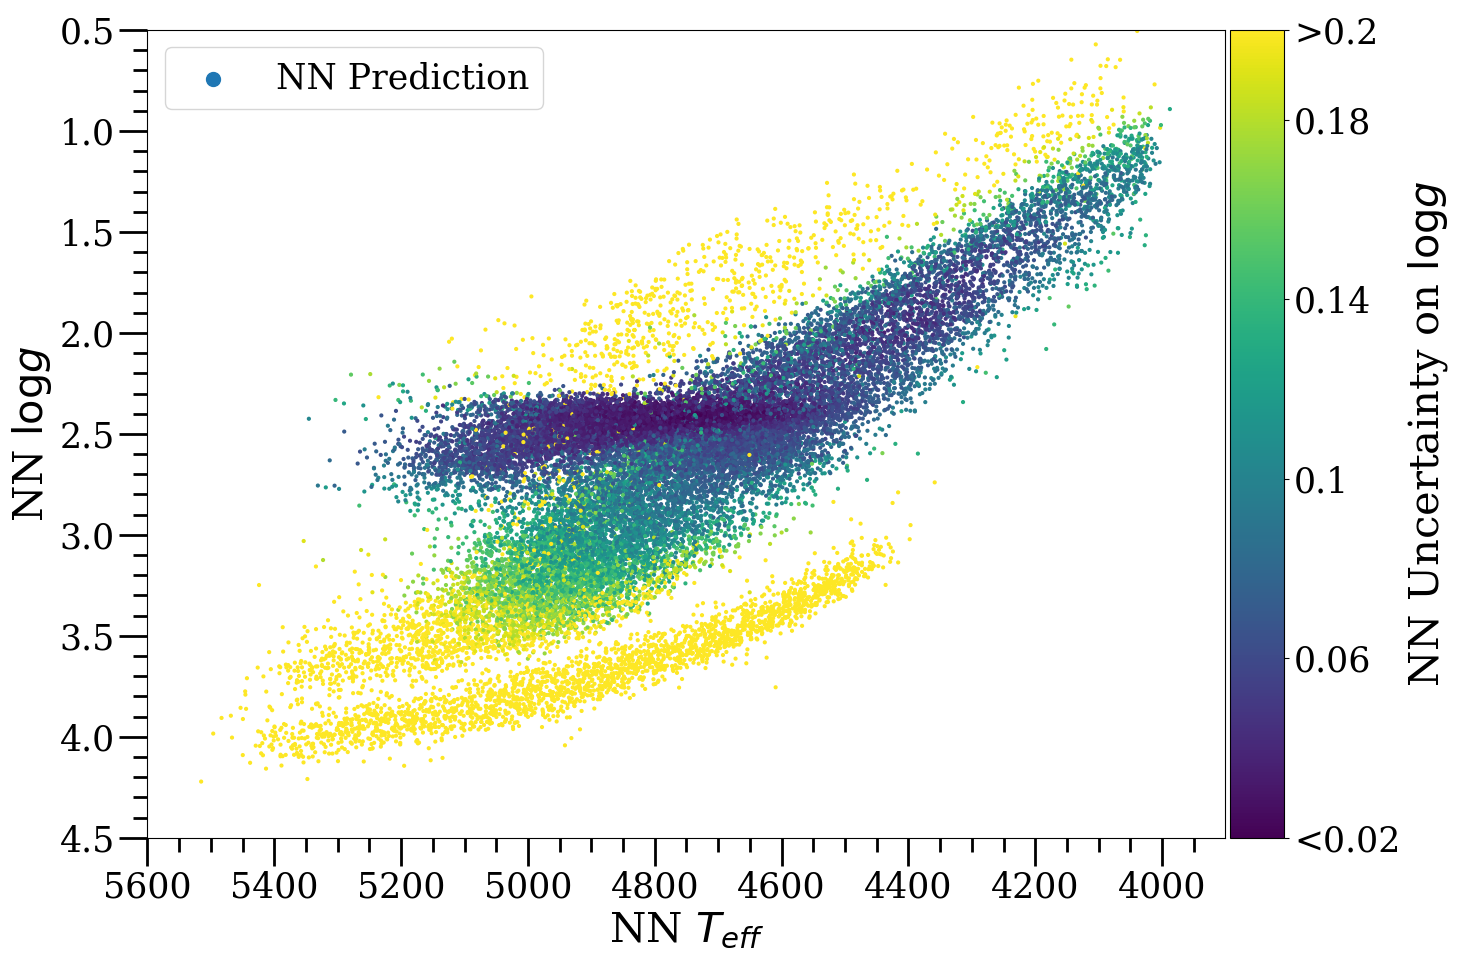

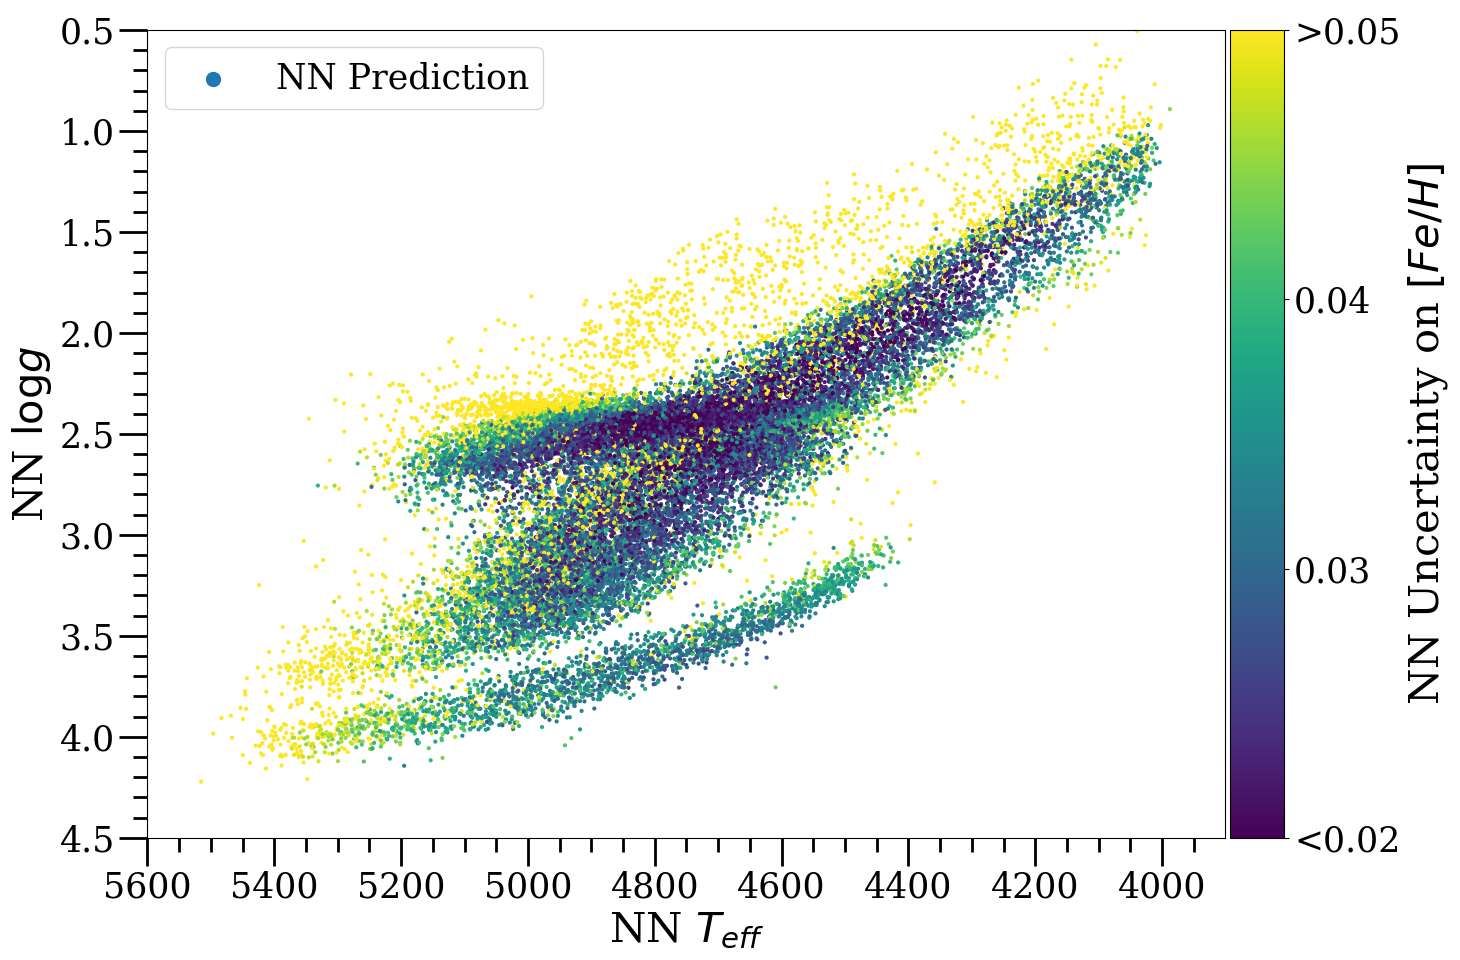

In [11]:
%matplotlib inline
import numpy as np
import pylab as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rc("font", **{"family": "serif", "weight": "medium", "size": 20})

fig = plt.figure(figsize=(15, 10), dpi=100)
ax = plt.gca()
plt.scatter(
    pred[:, 0],
    pred[:, 1],
    s=4.0,
    c=np.clip(pred_err["total"][:, 0], 25, 75),
    rasterized=True,
    label=f"NN Prediction",
)
plt.xlabel("NN " + "$T_{eff}$", fontsize=30)
plt.ylabel("NN " + "$\log{g}$", fontsize=30)
plt.xlim((3900.0, 5600))
plt.ylim((0.5, 4.5))
plt.legend(loc="best", fontsize=25, markerscale=5)
plt.minorticks_on()
plt.tick_params(labelsize=25, width=2, length=20, which="major")
plt.tick_params(width=2, length=10, which="minor")
ax.invert_xaxis()
ax.invert_yaxis()
# colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cax=cax, ticks=[25, 35, 45, 55, 65, 75])
cbar.ax.set_yticklabels(["<25", *[str(r) for r in [35, 45, 55, 65]], ">75"])
cbar.ax.tick_params(labelsize=25)
cbar.set_label("NN Uncertainty on " + "$T_{eff}$", size=30)
plt.tight_layout()
plt.savefig("logg_teff_fe_tefferr.pdf")
plt.show()

fig = plt.figure(figsize=(15, 10), dpi=100)
ax = plt.gca()
plt.scatter(
    pred[:, 0],
    pred[:, 1],
    s=4.0,
    c=np.clip(pred_err["total"][:, 1], 0.02, 0.2),
    rasterized=True,
    label=f"NN Prediction",
)
plt.xlabel("NN " + "$T_{eff}$", fontsize=30)
plt.ylabel("NN " + "$\log{g}$", fontsize=30)
plt.xlim((3900.0, 5600))
plt.ylim((0.5, 4.5))
plt.legend(loc="best", fontsize=25, markerscale=5)
plt.minorticks_on()
plt.tick_params(labelsize=25, width=2, length=20, which="major")
plt.tick_params(width=2, length=10, which="minor")
ax.invert_xaxis()
ax.invert_yaxis()
# colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cax=cax, ticks=[0.02, 0.06, 0.1, 0.14, 0.18, 0.2])
cbar.ax.set_yticklabels(["<0.02", *[str(r) for r in [0.06, 0.1, 0.14, 0.18]], ">0.2"])
cbar.ax.tick_params(labelsize=25)
cbar.set_label("NN Uncertainty on " + "$\log{g}$", size=30)
plt.tight_layout()
plt.savefig("logg_teff_fe_loggerr.pdf")
plt.show()

fig = plt.figure(figsize=(15, 10), dpi=100)
ax = plt.gca()
plt.scatter(
    pred[:, 0],
    pred[:, 1],
    s=4.0,
    c=np.clip(pred_err["total"][:, 19], 0.02, 0.05),
    rasterized=True,
    label=f"NN Prediction",
)
plt.xlabel("NN " + "$T_{eff}$", fontsize=30)
plt.ylabel("NN " + "$\log{g}$", fontsize=30)
plt.xlim((3900.0, 5600))
plt.ylim((0.5, 4.5))
plt.legend(loc="best", fontsize=25, markerscale=5)
plt.minorticks_on()
plt.tick_params(labelsize=25, width=2, length=20, which="major")
plt.tick_params(width=2, length=10, which="minor")
ax.invert_xaxis()
ax.invert_yaxis()
# colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cax=cax, ticks=[0.02, 0.03, 0.04, 0.05])
cbar.ax.set_yticklabels(["<0.02", *[str(r) for r in [0.03, 0.04]], ">0.05"])
cbar.ax.tick_params(labelsize=25)
cbar.set_label("NN Uncertainty on " + "$[Fe/H]$", size=30)
plt.tight_layout()
plt.savefig("logg_teff_fe_feherr.pdf")
plt.show()

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(30, 10), dpi=100)
img0 = ax[0].scatter(
    pred[:, 0],
    pred[:, 1],
    s=4.0,
    c=np.clip(pred[:, 19], -1.5, 0.25),
    rasterized=True,
    label=f"NN Prediction",
)
# screenshot and use PhotoShop to find the right color in hex
ax[0].plot(
    teff_isochrone_p025[good_idx_p025],
    logg_isochrone_p025[good_idx_p025],
    lw=3.0,
    c="#fde725",
    label=r"$0.25 [M/H]$",
    path_effects=[pe.Stroke(linewidth=5, foreground="k"), pe.Normal()],
)
ax[0].plot(
    teff_isochrone_n025[good_idx_n025],
    logg_isochrone_n025[good_idx_n025],
    lw=3.0,
    c="#4ac16d",
    label=r"$-0.25 [M/H]$",
    path_effects=[pe.Stroke(linewidth=5, foreground="k"), pe.Normal()],
)
ax[0].plot(
    teff_isochrone_n075[good_idx_n075],
    logg_isochrone_n075[good_idx_n075],
    lw=3.0,
    c="#247886",
    label=r"$-0.75 [M/H]$",
    path_effects=[pe.Stroke(linewidth=5, foreground="k"), pe.Normal()],
)
ax[0].plot(
    teff_isochrone_n175[good_idx_n175],
    logg_isochrone_n175[good_idx_n175],
    lw=3.0,
    c="#440154",
    label=r"$-1.75 [M/H]$",
    path_effects=[pe.Stroke(linewidth=5, foreground="k"), pe.Normal()],
)
ax[0].set_xlabel("NN " + "$T_{eff}$", fontsize=30)
ax[0].set_ylabel("NN " + "$\log{g}$", fontsize=30)
ax[0].set_xlim((3900.0, 5600))
ax[0].set_ylim((0.5, 4.5))
ax[0].legend(loc="best", fontsize=25, markerscale=5)
ax[0].minorticks_on()
ax[0].tick_params(labelsize=25, width=2, length=20, which="major")
ax[0].tick_params(width=2, length=10, which="minor")
ax[0].invert_xaxis()
ax[0].invert_yaxis()
# colorbar
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(
    img0, cax=cax, ticks=[-1.5, -1.25, -1.0, -0.75, -0.5, -0.25, 0.0, 0.25]
)
cbar.ax.set_yticklabels(
    ["<-1.5", "-1.25", "-1.0", "-0.75", "-0.5", "-0.25", "0.0", ">0.25"]
)
cbar.set_clim(vmin=-1.5, vmax=0.25)
cbar.ax.tick_params(labelsize=25)
cbar.set_label("NN " + "$[Fe/H]$", size=30)

img1 = ax[1].scatter(
    pred[:, 0],
    pred[:, 1],
    s=4.0,
    c=np.clip(pred_err["total"][:, 1], 0.02, 0.2),
    rasterized=True,
    label=f"NN Prediction",
)
ax[1].set_xlabel("NN " + "$T_{eff}$", fontsize=30)
ax[1].set_ylabel("NN " + "$\log{g}$", fontsize=30)
ax[1].set_xlim((3900.0, 5600))
ax[1].set_ylim((0.5, 4.5))
ax[1].legend(loc="best", fontsize=25, markerscale=5)
ax[1].minorticks_on()
ax[1].tick_params(labelsize=25, width=2, length=20, which="major")
ax[1].tick_params(width=2, length=10, which="minor")
ax[1].invert_xaxis()
ax[1].invert_yaxis()
# colorbar
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(img1, cax=cax, ticks=[0.02, 0.06, 0.1, 0.14, 0.18, 0.2])
cbar.ax.set_yticklabels(["<0.02", *[str(r) for r in [0.06, 0.1, 0.14, 0.18]], ">0.2"])
cbar.ax.tick_params(labelsize=25)
cbar.set_label("NN Uncertainty on " + "$\log{g}$", size=30)
plt.tight_layout()
plt.savefig("logg_teff_fe_panel_2only.pdf")

In [2]:
import pandas as pd
from IPython.display import display, HTML
from astropy.stats import mad_std as mad

residue = pred - y

bias = np.ma.median(np.ma.array(residue, mask=[y == -9999.0]), axis=0)
scatter = mad(np.ma.array(residue, mask=[y == -9999.0]), axis=0)

d = {
    "Name": bcnn.targetname,
    "Bias": [f"{bias_single:.{3}f}" for bias_single in bias],
    "Scatter": [f"{scatter_single:.{3}f}" for scatter_single in scatter],
}
df = pd.DataFrame(data=d)
display(HTML(df.to_html()))

In [ ]:
%matplotlib inline
import numpy as np
import pylab as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import NullFormatter, MultipleLocator, FormatStrFormatter
from astroNN.nn.numpy import median_absolute_error
from utils_apogee import aspcap_windows_url_correction

plt.rc("font", **{"family": "serif", "weight": "medium", "size": 20})

gs = gridspec.GridSpec(2, 1, height_ratios=[1, 6])
fig = plt.figure(figsize=(15, 18))

# Teff
aspcap_idx = 0
number_bin = 20
low_teff = 4000.0
high_teff = 5500.0
median_abs_diff_teff = []
median_confidence_teff = []
median_modelconfidence_teff = []
spaces_teff = np.linspace(low_teff, high_teff, number_bin + 1)

# Binning

for i in range(number_bin):
    idx = (y[:, aspcap_idx] < spaces_teff[i + 1]) & (y[:, aspcap_idx] > spaces_teff[i])
    median_abs_diff_teff.append(
        np.median(np.abs(pred[:, aspcap_idx][idx] - y[:, aspcap_idx][idx]))
    )
    median_confidence_teff.append(np.median(pred_err["total"][:, aspcap_idx][idx]))
    median_modelconfidence_teff.append(np.median(pred_err["model"][:, aspcap_idx][idx]))

median_abs_diff_teff.append(0.0)
median_confidence_teff.append(0.0)
median_modelconfidence_teff.append(0.0)

# Log(g)
aspcap_idx = 1
number_bin = 17
low_logg = 0.4  # because min(logg) in the dataset is 0.42667553
high_logg = 3.8
mean_abs_diff_logg = []
mean_confidence_logg = []
mean_modelconfidence_logg = []
spaces_logg = np.linspace(low_logg, high_logg, number_bin + 1)

# Binning
for i in range(number_bin):
    idx = (y[:, aspcap_idx] < spaces_logg[i + 1]) & (y[:, aspcap_idx] > spaces_logg[i])
    mean_abs_diff_logg.append(
        np.median(np.abs(pred[:, aspcap_idx][idx] - y[:, aspcap_idx][idx]))
    )
    mean_confidence_logg.append(np.median(pred_err["total"][:, aspcap_idx][idx]))
    mean_modelconfidence_logg.append(np.median(pred_err["model"][:, aspcap_idx][idx]))

mean_abs_diff_logg.append(0.0)
mean_confidence_logg.append(0.0)
mean_modelconfidence_logg.append(0.0)

inner1 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[0])
ax0 = plt.Subplot(fig, inner1[0])
ax0.plot(
    spaces_teff,
    median_abs_diff_teff,
    ls="steps-post",
    linewidth=2.0,
    label="$T_{eff}$" + " MAE in 75K bins",
)
ax0.errorbar(
    spaces_teff + 37.5,
    median_abs_diff_teff,
    yerr=median_confidence_teff,
    linestyle="None",
    capsize=7,
    elinewidth=1.0,
    capthick=2.0,
    label="Mean Total Uncertainty",
)
ax0.errorbar(
    spaces_teff + 37.5,
    median_abs_diff_teff,
    yerr=median_modelconfidence_teff,
    linestyle="None",
    capsize=7,
    elinewidth=1.0,
    capthick=2.0,
    alpha=0.7,
    label="Model Uncertainty Component",
)
# ax[0].set_xlabel('ASPCAP ' + "$T_{eff}$", fontsize=25)
ax0.set_ylabel("MAE (K)", fontsize=25)
ax0.set_xlabel(r"$T_\mathrm{eff}$" + " (K)", fontsize=25)
ax0.set_xlim((low_teff, high_teff - 2))
ax0.axhline(0, ls="--", c="k", lw=1.0, alpha=0.7)
ax0.legend(loc="best", fontsize=15)
ax0.minorticks_on()
ax0.tick_params(labelsize=15, width=2.5, length=8, which="major")
ax0.tick_params(width=2, length=4, which="minor")

ax1 = plt.Subplot(fig, inner1[1])
ax1.plot(
    spaces_logg,
    mean_abs_diff_logg,
    ls="steps-post",
    linewidth=2.0,
    label="$log{g}$" + "  MAE in 0.2 dex bins",
)
ax1.errorbar(
    spaces_logg + 0.1,
    mean_abs_diff_logg,
    yerr=mean_confidence_logg,
    linestyle="None",
    capsize=7,
    elinewidth=1.0,
    capthick=2.0,
    label="Mean Total Uncertainty",
)
ax1.errorbar(
    spaces_logg + 0.1,
    mean_abs_diff_logg,
    yerr=mean_modelconfidence_logg,
    linestyle="None",
    capsize=7,
    elinewidth=1.0,
    capthick=2.0,
    alpha=0.7,
    label="Model Uncertainty Component",
)
# ax[1].set_xlabel('ASPCAP ' + "$\log{g}$", fontsize=25)
ax1.set_ylabel("MAE (dex)", fontsize=25)
ax1.set_xlabel(r"$\log{g}$" + " (dex)", fontsize=25)

ax1.set_xlim((low_logg, high_logg - 0.001))
ax1.axhline(0, ls="--", c="k", lw=1.0, alpha=0.7)
ax1.legend(loc="best", fontsize=15)
ax1.minorticks_on()
ax1.tick_params(labelsize=15, width=2.5, length=8, which="major")
ax1.tick_params(width=2, length=4, which="minor")

fig.add_subplot(ax0)
fig.add_subplot(ax1)

inner2 = gridspec.GridSpecFromSubplotSpec(5, 4, subplot_spec=gs[1], wspace=0, hspace=0)

# basic parameters
number_bin = 17
low_x = -2.6
high_x = 0.8
spaces_x = np.linspace(low_x, high_x, number_bin + 1)
xmajorLocator = MultipleLocator(0.7)
ymajorLocator = MultipleLocator(0.08)

aspcap_idx = 2

ax = [[plt.Subplot(fig, inner2[i, j]) for j in range(4)] for i in range(5)]

for i in range(5):
    for j in range(4):
        median_abs_diff_x = []
        median_confidence_x = []
        median_modelconfidence_x = []
        if aspcap_idx > 22:
            aspcap_idx = 22

        for ii in range(number_bin):
            idx = (y[:, aspcap_idx] < spaces_x[ii + 1]) & (
                y[:, aspcap_idx] > spaces_x[ii]
            )
            if np.sum(idx) != 0:
                median_abs_diff_x.append(
                    median_absolute_error(
                        pred[:, aspcap_idx][idx], y[:, aspcap_idx][idx]
                    )
                )
                median_confidence_x.append(
                    np.median(pred_err["total"][:, aspcap_idx][idx])
                )
                median_modelconfidence_x.append(
                    np.median(pred_err["model"][:, aspcap_idx][idx])
                )
            else:
                median_abs_diff_x.append(0.0)
                median_confidence_x.append(0.0)
                median_modelconfidence_x.append(0.0)

        median_abs_diff_x.append(0.0)
        median_confidence_x.append(0.0)
        median_modelconfidence_x.append(0.0)

        ax[i][j].plot(
            spaces_x,
            median_abs_diff_x,
            ls="steps-post",
            linewidth=2.0,
            label="$T_{eff}$",
        )
        ax[i][j].errorbar(
            spaces_x + 0.1,
            median_abs_diff_x,
            yerr=median_confidence_x,
            linestyle="None",
            capsize=3,
            elinewidth=1.0,
            capthick=2.0,
        )
        ax[i][j].errorbar(
            spaces_x + 0.1,
            median_abs_diff_x,
            yerr=median_modelconfidence_x,
            linestyle="None",
            capsize=3,
            elinewidth=1.0,
            capthick=2.0,
            alpha=0.7,
        )
        ax[i][j].set_xlim((low_x, high_x))
        ax[i][j].set_ylim((-0.1, 0.45))
        ax[i][j].axhline(0, ls="--", c="k", lw=1.0, alpha=0.7)
        ax[i][j].annotate(
            f"{aspcap_windows_url_correction(bcnn.targetname[aspcap_idx])}",
            xy=(0.60, 0.85),
            xycoords="axes fraction",
            fontsize=18,
        )
        if j == 0:
            ax[i][j].yaxis.set_major_locator(ymajorLocator)
            ax[i][j].set_yticks(np.arange(-0.1, 0.45, 0.1))
        else:
            ax[i][j].yaxis.set_major_formatter(NullFormatter())
            ax[i][j].yaxis.set_major_locator(ymajorLocator)
        if i == 4:
            ax[i][j].xaxis.set_major_locator(xmajorLocator)
        else:
            ax[i][j].xaxis.set_tick_params(direction="in", which="both")
        ax[i][j].minorticks_on()
        ax[i][j].tick_params(labelsize=15, width=2.5, length=8, which="major")
        ax[i][j].tick_params(width=2, length=4, which="minor")
        aspcap_idx += 1
        fig.add_subplot(ax[i][j])

fig.text(
    0.52,
    0.01,
    "ASPCAP " + "[X/H]" + " (0.2 dex bins)",
    fontdict={"fontsize": 25},
    ha="center",
)
fig.text(
    0.01,
    0.47,
    "Median Absolute Error (dex)",
    fontdict={"fontsize": 25},
    rotation=90,
    va="center",
)
fig.tight_layout(rect=[0.0, 0.02, 1.0, 1.0])
fig.savefig("teff_logg_xh_allin1_highSNR.pdf")
plt.show()

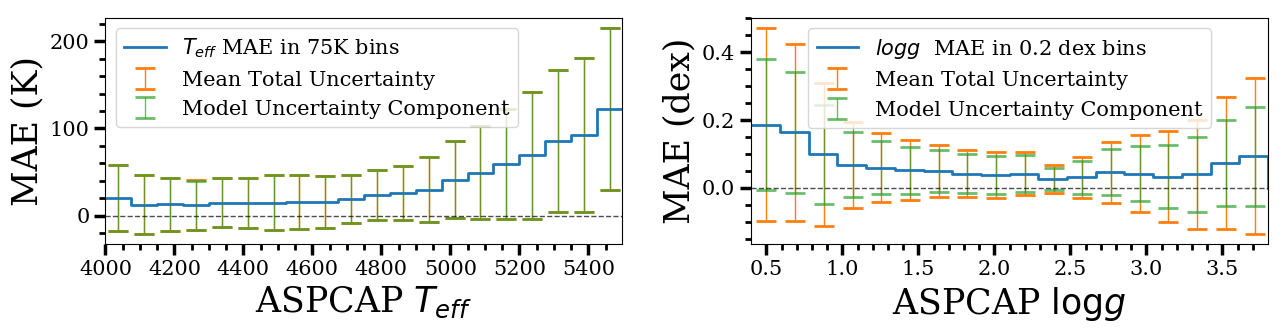

In [2]:
%matplotlib inline
import pylab as plt

plt.rc("font", **{"family": "serif", "weight": "medium", "size": 20})

# Teff
aspcap_idx = 0
number_bin = 20
low_teff = 4000.0
high_teff = 5500.0
median_abs_diff_teff = []
median_confidence_teff = []
median_modelconfidence_teff = []
spaces_teff = np.linspace(low_teff, high_teff, number_bin + 1)

# Binning

for i in range(number_bin):
    idx = (y[:, aspcap_idx] < spaces_teff[i + 1]) & (y[:, aspcap_idx] > spaces_teff[i])
    median_abs_diff_teff.append(
        np.median(np.abs(pred[:, aspcap_idx][idx] - y[:, aspcap_idx][idx]))
    )
    median_confidence_teff.append(np.median(pred_err["total"][:, aspcap_idx][idx]))
    median_modelconfidence_teff.append(np.median(pred_err["model"][:, aspcap_idx][idx]))

median_abs_diff_teff.append(0.0)
median_confidence_teff.append(0.0)
median_modelconfidence_teff.append(0.0)

# Log(g)
aspcap_idx = 1
number_bin = 17
low_logg = 0.4  # because min(logg) in the dataset is 0.42667553
high_logg = 3.8
mean_abs_diff_logg = []
mean_confidence_logg = []
mean_modelconfidence_logg = []
spaces_logg = np.linspace(low_logg, high_logg, number_bin + 1)

# Binning
for i in range(number_bin):
    idx = (y[:, aspcap_idx] < spaces_logg[i + 1]) & (y[:, aspcap_idx] > spaces_logg[i])
    mean_abs_diff_logg.append(
        np.median(np.abs(pred[:, aspcap_idx][idx] - y[:, aspcap_idx][idx]))
    )
    mean_confidence_logg.append(np.median(pred_err["total"][:, aspcap_idx][idx]))
    mean_modelconfidence_logg.append(np.median(pred_err["model"][:, aspcap_idx][idx]))

mean_abs_diff_logg.append(0.0)
mean_confidence_logg.append(0.0)
mean_modelconfidence_logg.append(0.0)

# setup plots
f, ax = plt.subplots(1, 2, figsize=(15, 3), dpi=100)

ax[0].plot(
    spaces_teff,
    median_abs_diff_teff,
    ls="steps-post",
    linewidth=2.0,
    label="$T_{eff}$" + " MAE in 75K bins",
)
ax[0].errorbar(
    spaces_teff + 37.5,
    median_abs_diff_teff,
    yerr=median_confidence_teff,
    linestyle="None",
    capsize=7,
    elinewidth=1.0,
    capthick=2.0,
    label="Mean Total Uncertainty",
)
ax[0].errorbar(
    spaces_teff + 37.5,
    median_abs_diff_teff,
    yerr=median_modelconfidence_teff,
    linestyle="None",
    capsize=7,
    elinewidth=1.0,
    capthick=2.0,
    alpha=0.7,
    label="Model Uncertainty Component",
)
ax[0].set_xlabel("ASPCAP " + "$T_{eff}$", fontsize=25)
ax[0].set_ylabel("MAE (K)", fontsize=25)
ax[0].set_xlim((low_teff, high_teff - 2))
ax[0].axhline(0, ls="--", c="k", lw=1.0, alpha=0.7)
ax[0].legend(loc="best", fontsize=15)
ax[0].minorticks_on()
ax[0].tick_params(labelsize=15, width=2.5, length=8, which="major")
ax[0].tick_params(width=2, length=4, which="minor")

ax[1].plot(
    spaces_logg,
    mean_abs_diff_logg,
    ls="steps-post",
    linewidth=2.0,
    label="$log{g}$" + "  MAE in 0.2 dex bins",
)
ax[1].errorbar(
    spaces_logg + 0.1,
    mean_abs_diff_logg,
    yerr=mean_confidence_logg,
    linestyle="None",
    capsize=7,
    elinewidth=1.0,
    capthick=2.0,
    label="Mean Total Uncertainty",
)
ax[1].errorbar(
    spaces_logg + 0.1,
    mean_abs_diff_logg,
    yerr=mean_modelconfidence_logg,
    linestyle="None",
    capsize=7,
    elinewidth=1.0,
    capthick=2.0,
    alpha=0.7,
    label="Model Uncertainty Component",
)
ax[1].set_xlabel("ASPCAP " + "$\log{g}$", fontsize=25)
ax[1].set_ylabel("MAE (dex)", fontsize=25)
ax[1].set_xlim((low_logg, high_logg - 0.001))
ax[1].axhline(0, ls="--", c="k", lw=1.0, alpha=0.7)
ax[1].legend(loc="best", fontsize=15)
ax[1].minorticks_on()
ax[1].tick_params(labelsize=15, width=2.5, length=8, which="major")
ax[1].tick_params(width=2, length=4, which="minor")

# f.tight_layout()
f.subplots_adjust(wspace=0.25)
f.savefig("delta_teff_logg_highSNR_2.png")

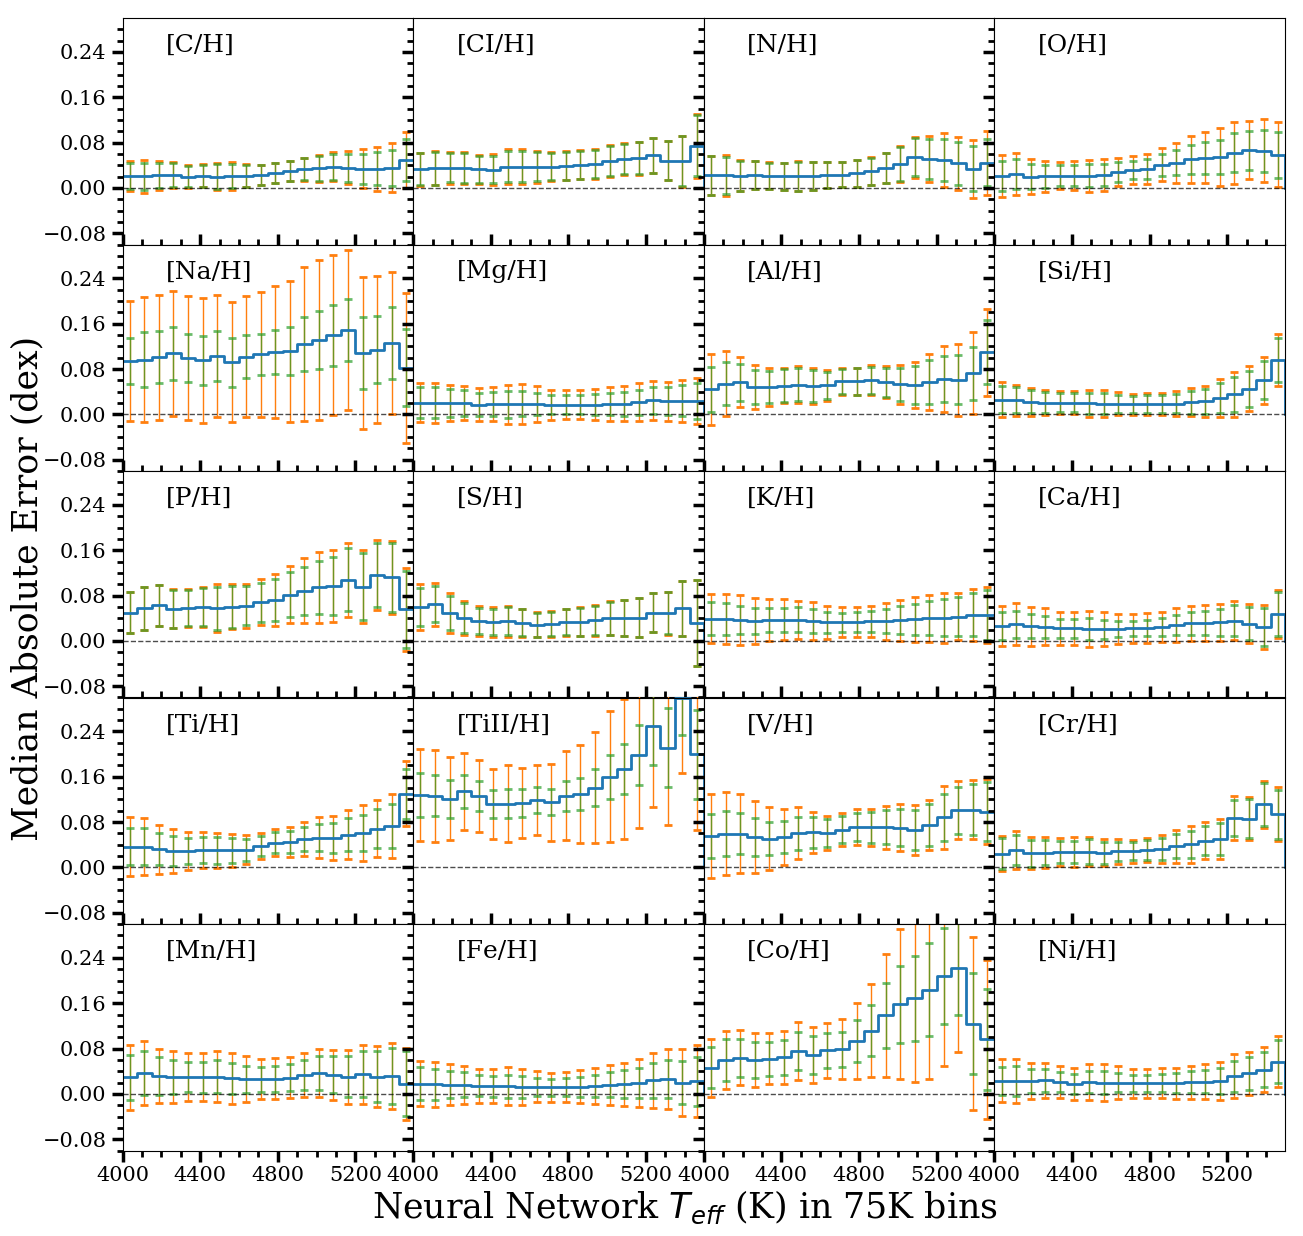

In [3]:
% matplotlib inline
import pylab as plt
from matplotlib.ticker import NullFormatter, MultipleLocator

from utils_apogee import aspcap_windows_url_correction
from astroNN.nn.numpy import median_absolute_error

plt.rc("font", **{"family": "serif", "weight": "medium", "size": 20})

# basic parameters
aspcap_idx = 2
number_bin = 20
low_teff = 4000.0
high_teff = 5500.0
spaces_teff_x = np.linspace(low_teff, high_teff, number_bin + 1)

# setup plots
f, ax = plt.subplots(5, 4, figsize=(15, 15), dpi=100, sharex=True, sharey=False)

xmajorLocator = MultipleLocator(400)
ymajorLocator = MultipleLocator(0.08)

aspcap_idx = 2

for i in range(5):
    for j in range(4):
        median_abs_diff_x = []
        median_confidence_x = []
        median_modelconfidence_x = []
        if aspcap_idx > 22:
            aspcap_idx = 22

        for ii in range(number_bin):
            idx = (pred[:, 0] < spaces_teff_x[ii + 1]) & (
                pred[:, 0] > spaces_teff_x[ii]
            )
            median_abs_diff_x.append(
                median_absolute_error(pred[:, aspcap_idx][idx], y[:, aspcap_idx][idx])
            )
            median_confidence_x.append(np.median(pred_err["total"][:, aspcap_idx][idx]))
            median_modelconfidence_x.append(
                np.median(pred_err["model"][:, aspcap_idx][idx])
            )

        median_abs_diff_x.append(0.0)
        median_confidence_x.append(0.0)
        median_modelconfidence_x.append(0.0)

        ax[i, j].plot(
            spaces_teff_x,
            median_abs_diff_x,
            ls="steps-post",
            linewidth=2.0,
            label="$T_{eff}$",
        )
        ax[i, j].errorbar(
            spaces_teff_x + 37.5,
            median_abs_diff_x,
            yerr=median_confidence_x,
            linestyle="None",
            capsize=3,
            elinewidth=1.0,
            capthick=2.0,
        )
        ax[i, j].errorbar(
            spaces_teff_x + 37.5,
            median_abs_diff_x,
            yerr=median_modelconfidence_x,
            linestyle="None",
            capsize=3,
            elinewidth=1.0,
            capthick=2.0,
            alpha=0.7,
        )
        ax[i, j].set_xlim((low_teff, high_teff - 2))
        ax[i, j].set_ylim((-0.1, 0.3))
        ax[i, j].axhline(0, ls="--", c="k", lw=1.0, alpha=0.7)
        ax[i, j].annotate(
            f"{aspcap_windows_url_correction(bcnn.targetname[aspcap_idx])}",
            xy=(0.15, 0.85),
            xycoords="axes fraction",
            fontsize=18,
        )
        if j == 0:
            ax[i, j].yaxis.set_major_locator(ymajorLocator)
        else:
            ax[i, j].yaxis.set_major_formatter(NullFormatter())
            ax[i, j].yaxis.set_major_locator(ymajorLocator)
        if i == 4:
            ax[i, j].xaxis.set_major_locator(xmajorLocator)
        else:
            ax[i, j].xaxis.set_tick_params(direction="in", which="both")
        ax[i, j].minorticks_on()
        ax[i, j].tick_params(labelsize=15, width=2.5, length=8, which="major")
        ax[i, j].tick_params(width=2, length=4, which="minor")
        aspcap_idx += 1
f.text(
    0.52,
    0.01,
    "Neural Network " + "$T_{eff}$" + " " + "(K) in 75K bins",
    fontdict={"fontsize": 25},
    ha="center",
)
f.text(
    0.01,
    0.52,
    "Median Absolute Error (dex)",
    fontdict={"fontsize": 25},
    rotation=90,
    va="center",
)
f.tight_layout(rect=[0.02, 0.02, 1.0, 1.0])
f.subplots_adjust(wspace=0, hspace=0)
f.savefig("delta_xh_teff_highSNR.pdf")

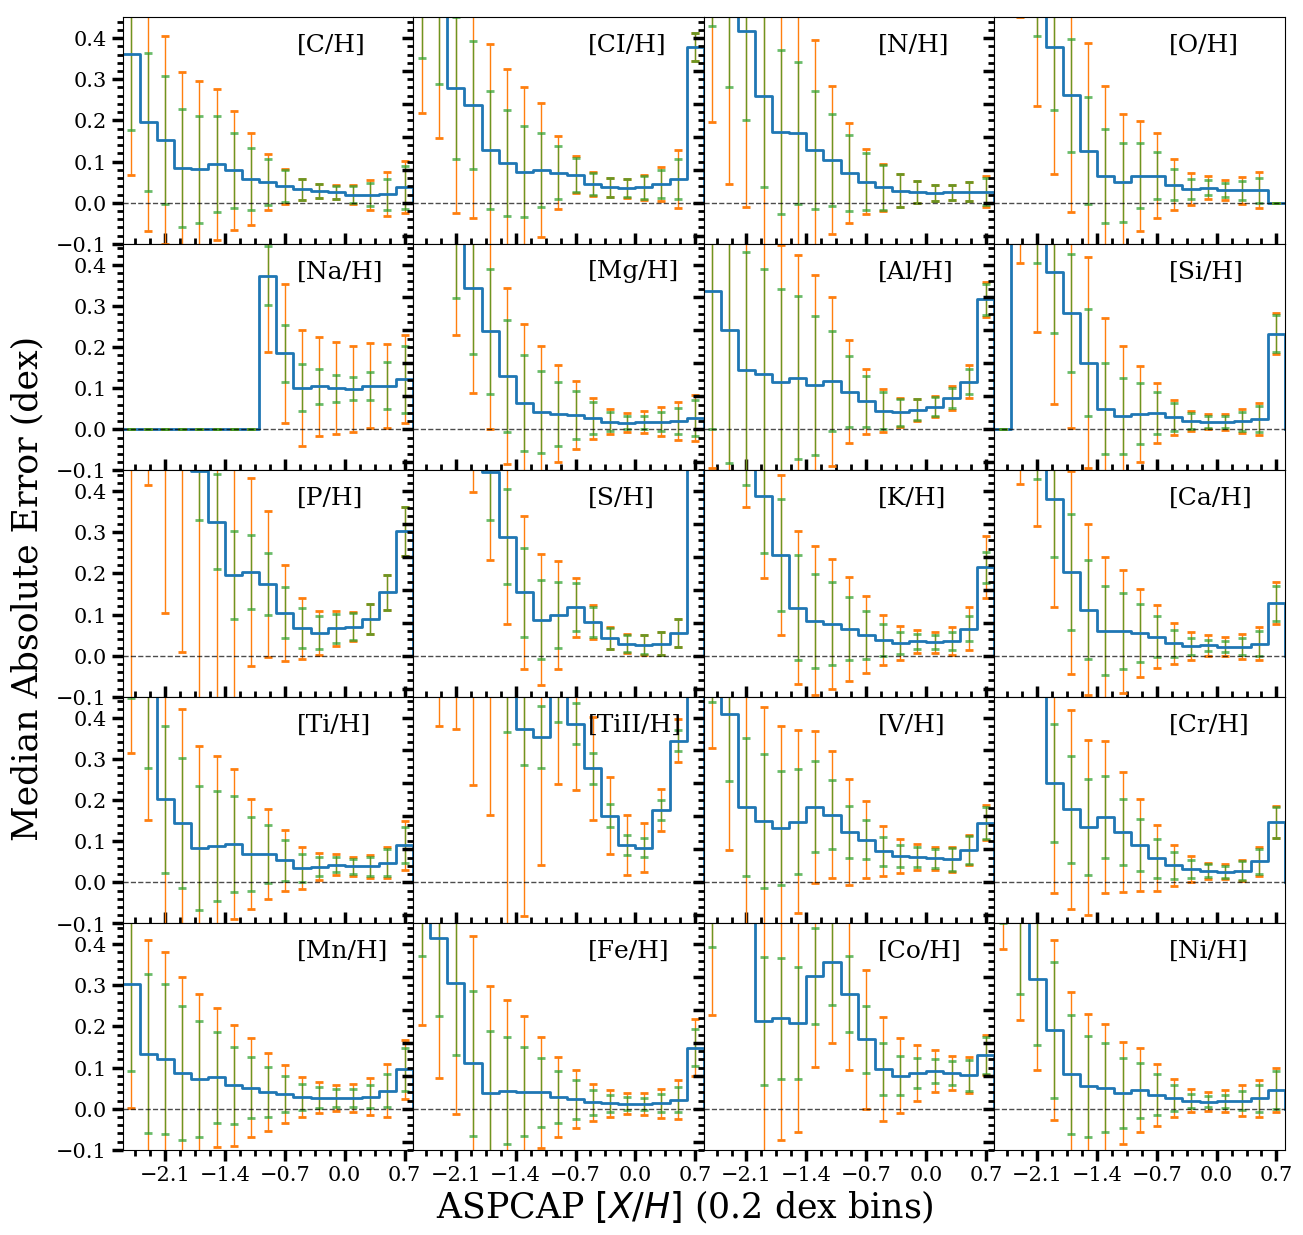

In [5]:
%matplotlib inline
import pylab as plt
from matplotlib.ticker import NullFormatter, MultipleLocator, FormatStrFormatter

from utils_apogee import aspcap_windows_url_correction
from astroNN.nn.numpy import median_absolute_error

plt.rc("font", **{"family": "serif", "weight": "medium", "size": 20})

# basic parameters
number_bin = 17
low_x = -2.6
high_x = 0.8
spaces_x = np.linspace(low_x, high_x, number_bin + 1)

# setup plots
f, ax = plt.subplots(5, 4, figsize=(15, 15), dpi=100, sharex=True, sharey=False)

xmajorLocator = MultipleLocator(0.7)
ymajorLocator = MultipleLocator(0.08)

aspcap_idx = 2

for i in range(5):
    for j in range(4):
        median_abs_diff_x = []
        median_confidence_x = []
        median_modelconfidence_x = []
        if aspcap_idx > 22:
            aspcap_idx = 22

        for ii in range(number_bin):
            idx = (y[:, aspcap_idx] < spaces_x[ii + 1]) & (
                y[:, aspcap_idx] > spaces_x[ii]
            )
            if np.sum(idx) != 0:
                median_abs_diff_x.append(
                    median_absolute_error(
                        pred[:, aspcap_idx][idx], y[:, aspcap_idx][idx]
                    )
                )
                median_confidence_x.append(
                    np.median(pred_err["total"][:, aspcap_idx][idx])
                )
                median_modelconfidence_x.append(
                    np.median(pred_err["model"][:, aspcap_idx][idx])
                )
            else:
                median_abs_diff_x.append(0.0)
                median_confidence_x.append(0.0)
                median_modelconfidence_x.append(0.0)

        median_abs_diff_x.append(0.0)
        median_confidence_x.append(0.0)
        median_modelconfidence_x.append(0.0)

        ax[i, j].plot(
            spaces_x,
            median_abs_diff_x,
            ls="steps-post",
            linewidth=2.0,
            label="$T_{eff}$",
        )
        ax[i, j].errorbar(
            spaces_x + 0.1,
            median_abs_diff_x,
            yerr=median_confidence_x,
            linestyle="None",
            capsize=3,
            elinewidth=1.0,
            capthick=2.0,
        )
        ax[i, j].errorbar(
            spaces_x + 0.1,
            median_abs_diff_x,
            yerr=median_modelconfidence_x,
            linestyle="None",
            capsize=3,
            elinewidth=1.0,
            capthick=2.0,
            alpha=0.7,
        )
        ax[i, j].set_xlim((low_x, high_x))
        ax[i, j].set_ylim((-0.1, 0.45))
        ax[i, j].axhline(0, ls="--", c="k", lw=1.0, alpha=0.7)
        ax[i, j].annotate(
            f"{aspcap_windows_url_correction(bcnn.targetname[aspcap_idx])}",
            xy=(0.60, 0.85),
            xycoords="axes fraction",
            fontsize=18,
        )
        if j == 0:
            ax[i, j].yaxis.set_major_locator(ymajorLocator)
            ax[i, j].set_yticks(np.arange(-0.1, 0.45, 0.1))
        else:
            ax[i, j].yaxis.set_major_formatter(NullFormatter())
            ax[i, j].yaxis.set_major_locator(ymajorLocator)
        if i == 4:
            ax[i, j].xaxis.set_major_locator(xmajorLocator)
        else:
            ax[i, j].xaxis.set_tick_params(direction="in", which="both")
        ax[i, j].minorticks_on()
        ax[i, j].tick_params(labelsize=15, width=2.5, length=8, which="major")
        ax[i, j].tick_params(width=2, length=4, which="minor")
        aspcap_idx += 1

f.text(
    0.52,
    0.01,
    "ASPCAP " + "$[X/H]$" + " (0.2 dex bins)",
    fontdict={"fontsize": 25},
    ha="center",
)
f.text(
    0.01,
    0.52,
    "Median Absolute Error (dex)",
    fontdict={"fontsize": 25},
    rotation=90,
    va="center",
)
f.tight_layout(rect=[0.02, 0.02, 1.0, 1.0])
f.subplots_adjust(wspace=0, hspace=0)
f.savefig("delta_xh_highSNR.pdf")

# Inference at different SNR to test Neural Network Performance

First load the combined spectra and corresponding RA, DEC and SNR so we can cross-match to individual visits

In [2]:
from utils_h5 import H5Loader

# Load the dataset testing data
loader2 = H5Loader("_highsnr_test")
loader2.load_combined = False  # load individual visits
loader2.load_err = False
# load the correct entry with correct order from ApogeeBCNNcensored
loader2.target = [
    "teff",
    "logg",
    "C",
    "C1",
    "N",
    "O",
    "Na",
    "Mg",
    "Al",
    "Si",
    "P",
    "S",
    "K",
    "Ca",
    "Ti",
    "Ti2",
    "V",
    "Cr",
    "Mn",
    "Fe",
    "Co",
    "Ni",
]
x, y = loader2.load()

# load RA, DEC, SNR entry
RA_visit = loader2.load_entry("RA")
DEC_visit = loader2.load_entry("DEC")
SNR_visit = loader2.load_entry("SNR")

visit_pred, visit_pred_err = bcnn.test(x)

Starting Dropout Variational Inference
Completed Dropout Variational Inference with 100 forward passes, 308.33s elapsed


In [3]:
from astroNN.datasets import xmatch
import numpy as np
import pandas as pd
from IPython.display import display, HTML
from astropy.stats import mad_std as mad

idx_1, idx_2, sep = xmatch(
    RA_visit,
    RA_combined,
    colRA1=RA_visit,
    colDec1=DEC_visit,
    colRA2=RA_combined,
    colDec2=DEC_combined,
)

# Absolute Difference between combined and individual visit
residue = visit_pred[idx_1] - pred[idx_2]
abs_diff = np.abs(residue)


bias = np.ma.median(np.ma.array(residue, mask=[y == -9999.0]), axis=0)
scatter = mad(np.ma.array(residue, mask=[y == -9999.0]), axis=0)

d = {
    "Name": bcnn.targetname,
    "Bias": [f"{bias_single:.{3}f}" for bias_single in bias],
    "Scatter": [f"{scatter_single:.{3}f}" for scatter_single in scatter],
}
df = pd.DataFrame(data=d)
display(HTML(df.to_html()))

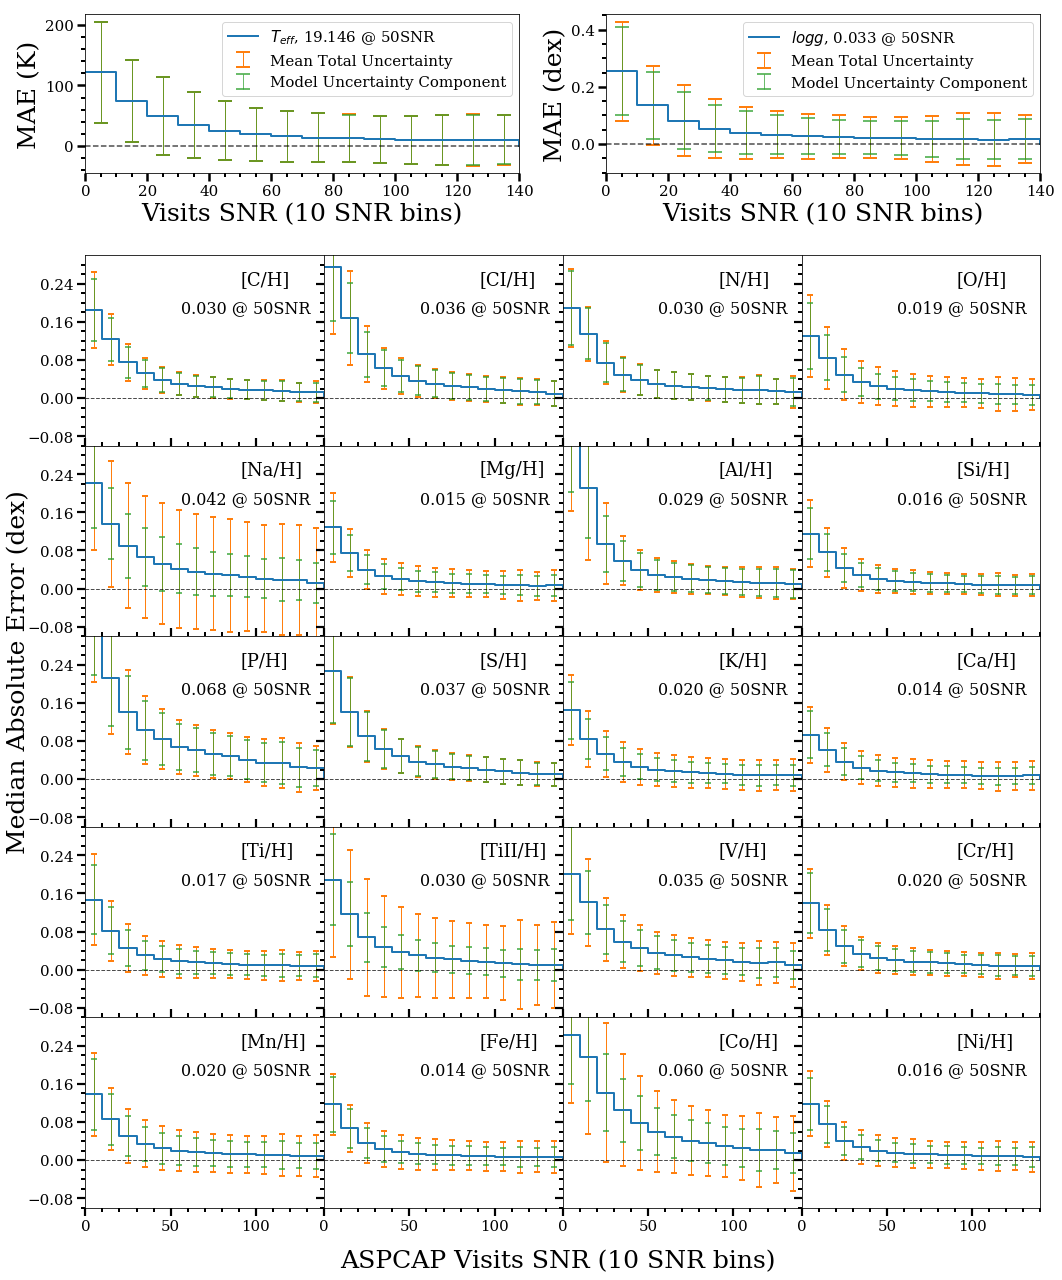

In [6]:
%matplotlib inline
import numpy as np
import pylab as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import NullFormatter, MultipleLocator, FormatStrFormatter
from utils_apogee import aspcap_windows_url_correction
from astroNN.nn.numpy import median_absolute_error

plt.rc("font", **{"family": "serif", "weight": "medium", "size": 20})

gs = gridspec.GridSpec(2, 1, height_ratios=[1, 6])
fig = plt.figure(figsize=(15, 18))

# Teff
aspcap_idx = 0
number_bin = 14
low_SNR = 0.0
high_SNR = 140.0
median_abs_diff_teff = []
median_confidence_teff = []
median_modelconfidence_teff = []
spaces_SNR = np.linspace(low_SNR, high_SNR, number_bin + 1)

# Binning

for i in range(number_bin):
    idx = (SNR_visit[idx_1] < spaces_SNR[i + 1]) & (SNR_visit[idx_1] > spaces_SNR[i])
    median_abs_diff_teff.append(np.median(abs_diff[:, aspcap_idx][idx]))
    median_confidence_teff.append(
        np.mean(visit_pred_err["total"][:, aspcap_idx][idx_1][idx])
    )
    median_modelconfidence_teff.append(
        np.mean(visit_pred_err["model"][:, aspcap_idx][idx_1][idx])
    )


median_abs_diff_teff.append(0.0)
median_confidence_teff.append(0.0)
median_modelconfidence_teff.append(0.0)

# Log(g)
aspcap_idx = 1
median_abs_diff_logg = []
median_confidence_logg = []
median_modelconfidence_logg = []

# Binning
for i in range(number_bin):
    idx = (SNR_visit[idx_1] < spaces_SNR[i + 1]) & (SNR_visit[idx_1] > spaces_SNR[i])
    median_abs_diff_logg.append(np.median(abs_diff[:, aspcap_idx][idx_1][idx]))
    median_confidence_logg.append(
        np.median(visit_pred_err["total"][:, aspcap_idx][idx_1][idx])
    )
    median_modelconfidence_logg.append(
        np.median(visit_pred_err["model"][:, aspcap_idx][idx_1][idx])
    )

median_abs_diff_logg.append(0.0)
median_confidence_logg.append(0.0)
median_modelconfidence_logg.append(0.0)

inner1 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[0])
ax0 = plt.Subplot(fig, inner1[0])
ax0.plot(
    spaces_SNR,
    median_abs_diff_teff,
    ls="steps-post",
    linewidth=2.0,
    label="$T_{eff}$, " + f"{median_abs_diff_teff[5]:.{3}f} @ 50SNR",
)
ax0.errorbar(
    spaces_SNR + 5,
    median_abs_diff_teff,
    yerr=median_confidence_teff,
    linestyle="None",
    capsize=7,
    elinewidth=1.0,
    capthick=2.0,
    label="Mean Total Uncertainty",
)
ax0.errorbar(
    spaces_SNR + 5,
    median_abs_diff_teff,
    yerr=median_modelconfidence_teff,
    linestyle="None",
    capsize=7,
    elinewidth=1.0,
    capthick=2.0,
    alpha=0.7,
    label="Model Uncertainty Component",
)
ax0.set_xlabel("Visits SNR (10 SNR bins)", fontsize=25)
ax0.set_ylabel("MAE (K)", fontsize=25)
ax0.set_xlim((low_SNR, high_SNR))
ax0.axhline(0, ls="--", c="k", alpha=0.7)
ax0.legend(loc="best", fontsize=15)
ax0.minorticks_on()
ax0.tick_params(labelsize=15, width=2.5, length=8, which="major")
ax0.tick_params(width=2, length=4, which="minor")

ax1 = plt.Subplot(fig, inner1[1])
ax1.plot(
    spaces_SNR,
    median_abs_diff_logg,
    ls="steps-post",
    linewidth=2.0,
    label="$log{g}$, " + f"{median_abs_diff_logg[5]:.{3}f} @ 50SNR",
)
ax1.errorbar(
    spaces_SNR + 5,
    median_abs_diff_logg,
    yerr=median_confidence_logg,
    linestyle="None",
    capsize=7,
    elinewidth=1.0,
    capthick=2.0,
    label="Mean Total Uncertainty",
)
ax1.errorbar(
    spaces_SNR + 5,
    median_abs_diff_logg,
    yerr=median_modelconfidence_logg,
    linestyle="None",
    capsize=7,
    elinewidth=1.0,
    capthick=2.0,
    alpha=0.7,
    label="Model Uncertainty Component",
)
ax1.set_xlabel("Visits SNR (10 SNR bins)", fontsize=25)
ax1.set_ylabel("MAE (dex)", fontsize=25)
ax1.set_xlim((low_SNR, high_SNR))
ax1.axhline(0, ls="--", c="k", alpha=0.7)
ax1.legend(loc="best", fontsize=15)
ax1.minorticks_on()
ax1.tick_params(labelsize=15, width=2.5, length=8, which="major")
ax1.tick_params(width=2, length=4, which="minor")

fig.add_subplot(ax0)
fig.add_subplot(ax1)

inner2 = gridspec.GridSpecFromSubplotSpec(5, 4, subplot_spec=gs[1], wspace=0, hspace=0)

# basic parameters
aspcap_idx = 2
number_bin = 14
low_SNR = 0.0
high_SNR = 140.0
spaces_SNR = np.linspace(low_SNR, high_SNR, number_bin + 1)
# setup plots

xmajorLocator = MultipleLocator(50)
ymajorLocator = MultipleLocator(0.08)

ax = [[plt.Subplot(fig, inner2[i, j]) for j in range(4)] for i in range(5)]

for i in range(5):
    for j in range(4):
        median_abs_diff_x = []
        median_confidence_x = []
        median_modelconfidence_x = []
        if aspcap_idx > 22:
            aspcap_idx = 22

        for ii in range(number_bin):
            idx = (SNR_visit[idx_1] < spaces_SNR[ii + 1]) & (
                SNR_visit[idx_1] > spaces_SNR[ii]
            )
            median_abs_diff_x.append(np.median(abs_diff[:, aspcap_idx][idx_1][idx]))
            median_confidence_x.append(
                np.median(visit_pred_err["total"][:, aspcap_idx][idx_1][idx])
            )
            median_modelconfidence_x.append(
                np.median(visit_pred_err["model"][:, aspcap_idx][idx_1][idx])
            )

        median_abs_diff_x.append(0.0)
        median_confidence_x.append(0.0)
        median_modelconfidence_x.append(0.0)

        ax[i][j].plot(
            spaces_SNR,
            median_abs_diff_x,
            ls="steps-post",
            linewidth=2.0,
            label="$T_{eff}$",
        )
        ax[i][j].errorbar(
            spaces_SNR + 5,
            median_abs_diff_x,
            yerr=median_confidence_x,
            linestyle="None",
            capsize=3,
            elinewidth=1.0,
            capthick=2.0,
        )
        ax[i][j].errorbar(
            spaces_SNR + 5,
            median_abs_diff_x,
            yerr=median_modelconfidence_x,
            linestyle="None",
            capsize=3,
            elinewidth=1.0,
            capthick=2.0,
            alpha=0.7,
        )
        ax[i][j].set_xlim((low_SNR, high_SNR))
        ax[i][j].set_ylim((-0.1, 0.3))
        ax[i][j].axhline(0, ls="--", c="k", lw=1.0, alpha=0.7)
        ax[i][j].annotate(
            f"{bcnn.targetname[aspcap_idx]}",
            xy=(0.65, 0.85),
            xycoords="axes fraction",
            fontsize=18,
        )
        ax[i][j].annotate(
            f"{median_abs_diff_x[5]:.{3}f} @ 50SNR",
            xy=(0.40, 0.70),
            xycoords="axes fraction",
            fontsize=16,
        )
        if j == 0:
            pass
            ax[i][j].yaxis.set_major_locator(ymajorLocator)
        else:
            ax[i][j].yaxis.set_major_formatter(NullFormatter())
            ax[i][j].yaxis.set_major_locator(ymajorLocator)
        if i == 4:
            ax[i][j].xaxis.set_major_locator(xmajorLocator)
        else:
            ax[i][j].xaxis.set_major_formatter(NullFormatter())
            ax[i][j].xaxis.set_tick_params(direction="in", which="both")
        ax[i][j].minorticks_on()
        ax[i][j].tick_params(labelsize=15, width=2.2, length=8, which="major")
        ax[i][j].tick_params(width=2, length=4, which="minor")
        aspcap_idx += 1
        fig.add_subplot(ax[i][j])

fig.text(
    0.52,
    0.01,
    "ASPCAP Visits SNR (10 SNR bins)",
    fontdict={"fontsize": 25},
    ha="center",
)
fig.text(
    0.01,
    0.47,
    "Median Absolute Error (dex)",
    fontdict={"fontsize": 25},
    rotation=90,
    va="center",
)
fig.tight_layout(rect=[0.0, 0.02, 1.0, 1.0])
fig.savefig("teff_logg_xh_SNR_allin1_theotherone.pdf")
plt.show()

## Jacobian

In [2]:
metal_poor_jac = bcnn.jacobian(
    x[pred[:, 19] < -1.5], mean_output=True, denormalize=True
)
metal_rich_jac = bcnn.jacobian(x[pred[:, 19] > 0.4], mean_output=True, denormalize=True)

Finished all gradient calculation, 24.13 seconds elapsed
Finished all gradient calculation, 18.58 seconds elapsed


In [3]:
# define HBR lines for plotting
HBR_blue_lines = np.array([15264.717, 15345.992, 15443.148, 15560.708]) - 15000.0
HBR_green_lines = np.array([15884.888, 16113.721, 16411.681]) - 15000.0
HBR_red_lines = np.array([16811.117]) - 15000.0

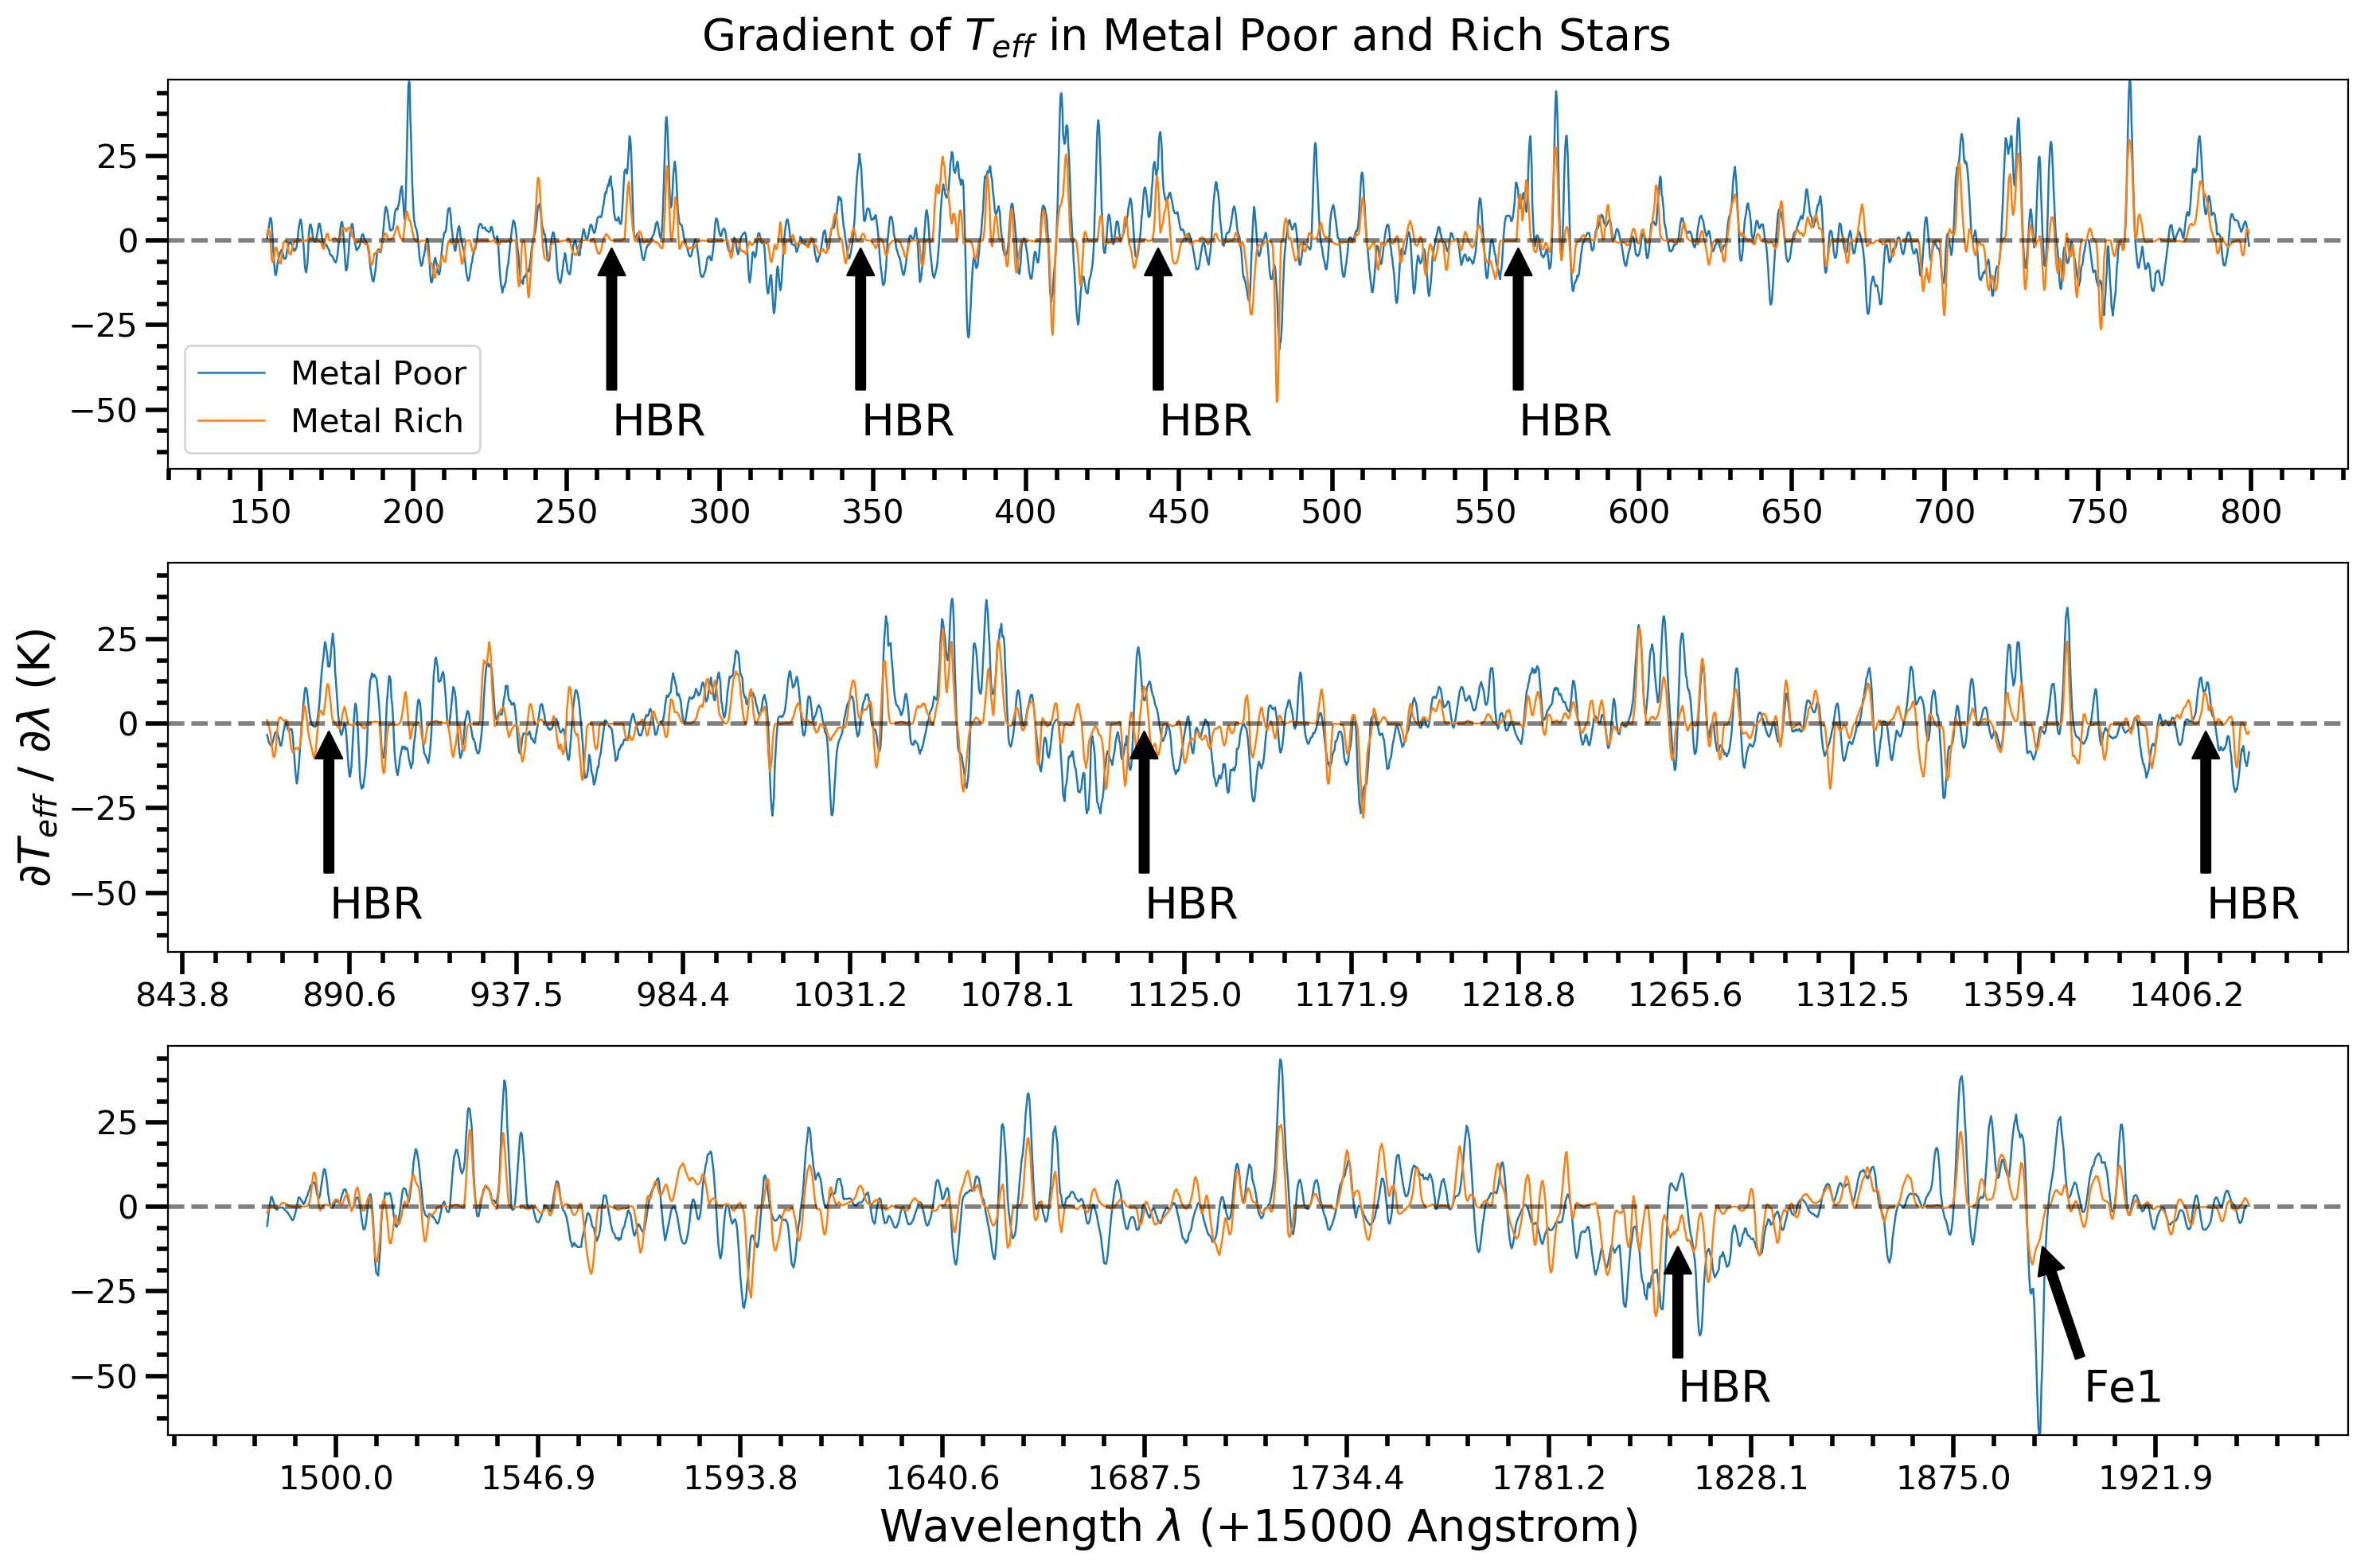

In [42]:
%matplotlib inline
import pylab as plt
import matplotlib.ticker as ticker
from astroNN.apogee.chips import wavelength_solution, chips_split

plt.rc("font", **{"family": "serif", "weight": "medium", "size": 20})

lambda_blue, lambda_green, lambda_red = wavelength_solution(dr=14)

lambda_blue -= 15000
lambda_green -= 15000
lambda_red -= 15000

nn_neuron = 0
target_name = "T_{eff}"

fig = plt.figure(figsize=(15, 10), dpi=200)
metal_poor_jac_b, metal_poor_jac_g, metal_poor_jac_r = chips_split(
    metal_poor_jac, dr=14
)
metal_rich_jac_b, metal_rich_jac_g, metal_rich_jac_r = chips_split(
    metal_rich_jac, dr=14
)

min_jacpoint = np.min(
    [np.min(metal_poor_jac[nn_neuron]), np.min(metal_rich_jac[nn_neuron])]
)
max_jacpoint = np.max(
    [np.max(metal_poor_jac[nn_neuron]), np.max(metal_rich_jac[nn_neuron])]
)

fig.suptitle(f"Gradient of ${target_name}$ in Metal Poor and Rich Stars", fontsize=20)
ax1 = fig.add_subplot(311)
ax1.plot(lambda_blue, metal_poor_jac_b[nn_neuron], linewidth=1.5, label="Metal Poor")
ax1.plot(lambda_blue, metal_rich_jac_b[nn_neuron], linewidth=1.5, label="Metal Rich")
ax1.set_ylim((min_jacpoint, max_jacpoint))
ax2 = fig.add_subplot(312)
ax2.set_ylabel(
    r"$\partial$" + f"${target_name}$" + " / " + r"$\partial\lambda$ (K)", fontsize=20
)
ax2.plot(lambda_green, metal_poor_jac_g[nn_neuron], linewidth=1.5, label="Metal Poor")
ax2.plot(lambda_green, metal_rich_jac_g[nn_neuron], linewidth=1.5, label="Metal Rich")
ax2.set_ylim((min_jacpoint, max_jacpoint))
ax3 = fig.add_subplot(313)
ax3.plot(lambda_red, metal_poor_jac_r[nn_neuron], linewidth=1.5, label="Metal Poor")
ax3.plot(lambda_red, metal_rich_jac_r[nn_neuron], linewidth=1.5, label="Metal Rich")
ax3.set_ylim((min_jacpoint, max_jacpoint))

ax1.tick_params(labelsize=15, width=2, length=10, which="major")
ax1.tick_params(width=2, length=5, which="minor")
ax2.tick_params(labelsize=15, width=2, length=10, which="major")
ax2.tick_params(width=2, length=5, which="minor")
ax3.tick_params(labelsize=15, width=2, length=10, which="major")
ax3.tick_params(width=2, length=5, which="minor")
leg = ax1.legend(loc="best", fontsize=15)
ax3.set_xlabel(r"Wavelength $\lambda$ (+15000 Angstrom)", fontsize=20)

ax1.axhline(0, ls="--", c="k", lw=1, alpha=0.5)
ax2.axhline(0, ls="--", c="k", lw=1, alpha=0.5)
ax3.axhline(0, ls="--", c="k", lw=1, alpha=0.5)
for legobj in leg.legendHandles:
    legobj.set_linewidth(3.0)

for HBR_blue_line in HBR_blue_lines:
    ax1.annotate(
        "HBR",
        xy=(HBR_blue_line, -0.01),
        xytext=(HBR_blue_line, min_jacpoint + 10.0),
        arrowprops=dict(facecolor="black", shrink=0.05),
        fontsize=20,
    )

for HBR_green_line in HBR_green_lines:
    ax2.annotate(
        "HBR",
        xy=(HBR_green_line, -0.01),
        xytext=(HBR_green_line, min_jacpoint + 10.0),
        arrowprops=dict(facecolor="black", shrink=0.05),
        fontsize=20,
    )

for HBR_red_line in HBR_red_lines:
    ax3.annotate(
        "HBR",
        xy=(HBR_red_line, -10),
        xytext=(HBR_red_line, min_jacpoint + 10.0),
        arrowprops=dict(facecolor="black", shrink=0.05),
        fontsize=20,
    )

ax3.annotate(
    "FeI",
    xy=(1895.183, -10),
    xytext=(1895.183 + 10.0, min_jacpoint + 10.0),
    arrowprops=dict(facecolor="black", shrink=0.05),
    fontsize=20,
)

tick_spacing = 75
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing / 1.5))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing / 1.6))
ax3.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing / 1.6))
ax1.minorticks_on()
ax2.minorticks_on()
ax3.minorticks_on()
plt.tight_layout(rect=[0, 0.00, 1, 0.96])
plt.savefig("jac_teff_fe.pdf")

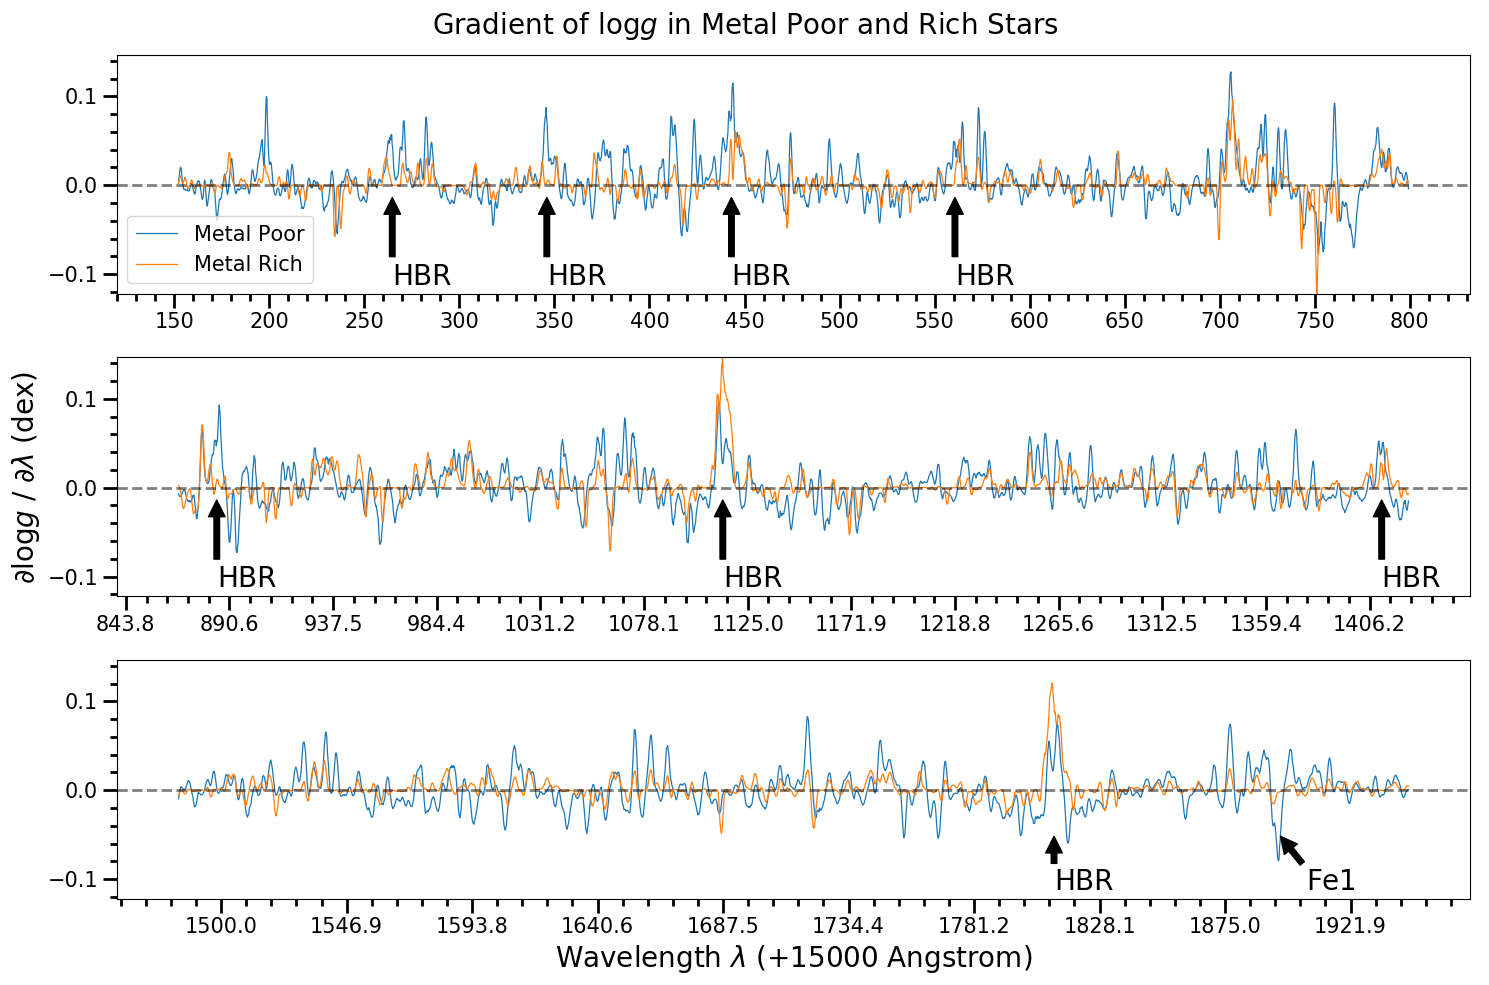

In [43]:
%matplotlib inline
import pylab as plt
import matplotlib.ticker as ticker
from astroNN.apogee.chips import wavelength_solution, chips_split

plt.rc("font", **{"family": "serif", "weight": "medium", "size": 20})

lambda_blue, lambda_green, lambda_red = wavelength_solution(dr=14)

lambda_blue -= 15000
lambda_green -= 15000
lambda_red -= 15000

nn_neuron = 1
target_name = "\log{g}"

fig = plt.figure(figsize=(15, 10), dpi=100)
metal_poor_jac_b, metal_poor_jac_g, metal_poor_jac_r = chips_split(
    metal_poor_jac, dr=14
)
metal_rich_jac_b, metal_rich_jac_g, metal_rich_jac_r = chips_split(
    metal_rich_jac, dr=14
)

min_jacpoint = np.min(
    [np.min(metal_poor_jac[nn_neuron]), np.min(metal_rich_jac[nn_neuron])]
)
max_jacpoint = np.max(
    [np.max(metal_poor_jac[nn_neuron]), np.max(metal_rich_jac[nn_neuron])]
)

fig.suptitle(f"Gradient of ${target_name}$ in Metal Poor and Rich Stars", fontsize=20)
ax1 = fig.add_subplot(311)
ax1.plot(lambda_blue, metal_poor_jac_b[nn_neuron], linewidth=1.5, label="Metal Poor")
ax1.plot(lambda_blue, metal_rich_jac_b[nn_neuron], linewidth=1.5, label="Metal Rich")
ax1.set_ylim((min_jacpoint, max_jacpoint))

ax2 = fig.add_subplot(312)
ax2.set_ylabel(
    r"$\partial$" + f"${target_name}$" + " / " + r"$\partial\lambda$ (dex)", fontsize=20
)
ax2.plot(lambda_green, metal_poor_jac_g[nn_neuron], linewidth=1.5, label="Metal Poor")
ax2.plot(lambda_green, metal_rich_jac_g[nn_neuron], linewidth=1.5, label="Metal Rich")
ax2.set_ylim((min_jacpoint, max_jacpoint))

ax3 = fig.add_subplot(313)
ax3.plot(lambda_red, metal_poor_jac_r[nn_neuron], linewidth=1.5, label="Metal Poor")
ax3.plot(lambda_red, metal_rich_jac_r[nn_neuron], linewidth=1.5, label="Metal Rich")
ax3.set_ylim((min_jacpoint, max_jacpoint))

ax1.tick_params(labelsize=15, width=2, length=10, which="major")
ax1.tick_params(width=2, length=5, which="minor")
ax2.tick_params(labelsize=15, width=2, length=10, which="major")
ax2.tick_params(width=2, length=5, which="minor")
ax3.tick_params(labelsize=15, width=2, length=10, which="major")
ax3.tick_params(width=2, length=5, which="minor")
leg = ax1.legend(loc="best", fontsize=15)
ax3.set_xlabel(r"Wavelength $\lambda$ (+15000 Angstrom)", fontsize=20)

ax1.axhline(0, ls="--", c="k", lw=1, alpha=0.5)
ax2.axhline(0, ls="--", c="k", lw=1, alpha=0.5)
ax3.axhline(0, ls="--", c="k", lw=1, alpha=0.5)
for legobj in leg.legendHandles:
    legobj.set_linewidth(3.0)

for HBR_blue_line in HBR_blue_lines:
    ax1.annotate(
        "HBR",
        xy=(HBR_blue_line, -0.01),
        xytext=(HBR_blue_line, min_jacpoint + 0.01),
        arrowprops=dict(facecolor="black", shrink=0.05),
        fontsize=20,
    )

for HBR_green_line in HBR_green_lines:
    ax2.annotate(
        "HBR",
        xy=(HBR_green_line, -0.01),
        xytext=(HBR_green_line, min_jacpoint + 0.01),
        arrowprops=dict(facecolor="black", shrink=0.05),
        fontsize=20,
    )

for HBR_red_line in HBR_red_lines:
    ax3.annotate(
        "HBR",
        xy=(HBR_red_line, -0.05),
        xytext=(HBR_red_line, min_jacpoint + 0.01),
        arrowprops=dict(facecolor="black", shrink=0.05),
        fontsize=20,
    )

ax3.annotate(
    "FeI",
    xy=(1895.183, -0.05),
    xytext=(1895.183 + 10.0, min_jacpoint + 0.01),
    arrowprops=dict(facecolor="black", shrink=0.05),
    fontsize=20,
)

tick_spacing = 75
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing / 1.5))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing / 1.6))
ax3.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing / 1.6))
ax1.minorticks_on()
ax2.minorticks_on()
ax3.minorticks_on()
plt.tight_layout(rect=[0, 0.00, 1, 0.96])
plt.savefig("jac_logg_fe.pdf")

In [7]:
%matplotlib inline
import pylab as plt
import matplotlib.ticker as ticker
from astroNN.apogee.chips import wavelength_solution, chips_split
from astroNN.apogee import aspcap_mask

plt.rc("font", **{"family": "serif", "weight": "medium", "size": 20})

lambda_blue, lambda_green, lambda_red = wavelength_solution(dr=14)

lambda_blue -= 15000
lambda_green -= 15000
lambda_red -= 15000

for nn_neuron in range(2, 22):
    tname = bcnn.targetname[nn_neuron].replace("/H]", "").replace("[", "")
    targetname = bcnn.targetname[nn_neuron]
    fig = plt.figure(figsize=(15, 10), dpi=100)
    metal_poor_jac_b, metal_poor_jac_g, metal_poor_jac_r = chips_split(
        metal_poor_jac, dr=14
    )
    metal_rich_jac_b, metal_rich_jac_g, metal_rich_jac_r = chips_split(
        metal_rich_jac, dr=14
    )
    c1_mask_b, c1_mask_g, c1_mask_r = chips_split(aspcap_mask(tname, dr=14), dr=14)

    min_jacpoint = -np.max(
        [np.abs(metal_poor_jac[nn_neuron]), np.abs(metal_rich_jac[nn_neuron])]
    )
    max_jacpoint = np.max(
        [np.abs(metal_poor_jac[nn_neuron]), np.abs(metal_rich_jac[nn_neuron])]
    )

    fig.suptitle(f"Gradient of {targetname} in Metal Poor and Rich Stars", fontsize=20)
    ax1 = fig.add_subplot(311)
    ax1.fill_between(lambda_blue, -10, 10, where=c1_mask_b[0], alpha=0.3, color="g")
    ax1.plot(
        lambda_blue, metal_poor_jac_b[nn_neuron], linewidth=1.5, label="Metal Poor"
    )
    ax1.plot(
        lambda_blue, metal_rich_jac_b[nn_neuron], linewidth=1.5, label="Metal Rich"
    )
    ax1.set_ylim((min_jacpoint, max_jacpoint))

    ax2 = fig.add_subplot(312)
    ax2.fill_between(lambda_green, -10, 10, where=c1_mask_g[0], alpha=0.3, color="g")
    ax2.set_ylabel(
        r"$\partial$" + f"{targetname}" + " / " + r"$\partial\lambda$ (dex)",
        fontsize=20,
    )
    ax2.plot(
        lambda_green, metal_poor_jac_g[nn_neuron], linewidth=1.5, label="Metal Poor"
    )
    ax2.plot(
        lambda_green, metal_rich_jac_g[nn_neuron], linewidth=1.5, label="Metal Rich"
    )
    ax2.set_ylim((min_jacpoint, max_jacpoint))

    ax3 = fig.add_subplot(313)
    ax3.fill_between(lambda_red, -10, 10, where=c1_mask_r[0], alpha=0.3, color="g")
    ax3.plot(lambda_red, metal_poor_jac_r[nn_neuron], linewidth=1.5, label="Metal Poor")
    ax3.plot(lambda_red, metal_rich_jac_r[nn_neuron], linewidth=1.5, label="Metal Rich")
    ax3.set_ylim((min_jacpoint, max_jacpoint))

    ax1.tick_params(labelsize=15, width=2, length=10, which="major")
    ax1.tick_params(width=2, length=5, which="minor")
    ax2.tick_params(labelsize=15, width=2, length=10, which="major")
    ax2.tick_params(width=2, length=5, which="minor")
    ax3.tick_params(labelsize=15, width=2, length=10, which="major")
    ax3.tick_params(width=2, length=5, which="minor")
    leg = ax1.legend(loc="best", fontsize=15)
    ax3.set_xlabel(r"Wavelength $\lambda$ (+15000 Angstrom)", fontsize=20)

    ax1.axhline(0, ls="--", c="k", lw=1, alpha=0.5)
    ax2.axhline(0, ls="--", c="k", lw=1, alpha=0.5)
    ax3.axhline(0, ls="--", c="k", lw=1, alpha=0.5)
    for legobj in leg.legendHandles:
        legobj.set_linewidth(3.0)

    for HBR_blue_line in HBR_blue_lines:
        ax1.annotate(
            "HBR",
            xy=(HBR_blue_line, -0.01),
            xytext=(HBR_blue_line, min_jacpoint + 0.01),
            arrowprops=dict(facecolor="black", shrink=0.05),
            fontsize=20,
        )

    for HBR_green_line in HBR_green_lines:
        ax2.annotate(
            "HBR",
            xy=(HBR_green_line, -0.01),
            xytext=(HBR_green_line, min_jacpoint + 0.01),
            arrowprops=dict(facecolor="black", shrink=0.05),
            fontsize=20,
        )

    for HBR_red_line in HBR_red_lines:
        ax3.annotate(
            "HBR",
            xy=(HBR_red_line, -0.05),
            xytext=(HBR_red_line, min_jacpoint + 0.01),
            arrowprops=dict(facecolor="black", shrink=0.05),
            fontsize=20,
        )

    ax3.annotate(
        "FeI",
        xy=(1895.183, -0.05),
        xytext=(1895.183 + 10.0, min_jacpoint + 0.01),
        arrowprops=dict(facecolor="black", shrink=0.05),
        fontsize=20,
    )

    tick_spacing = 75
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing / 1.5))
    ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing / 1.6))
    ax3.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing / 1.6))
    ax1.minorticks_on()
    ax2.minorticks_on()
    ax3.minorticks_on()
    plt.tight_layout(rect=[0, 0.00, 1, 0.96])
    plt.savefig(f"metal_rich_poor_jac\\jac_{tname}_h.pdf")
    plt.clf()
    plt.cla()
    plt.close()

In [24]:
hot_jac = bcnn.jacobian(x[pred[:, 0] < 4150], mean_output=True, denormalize=True)
cool_jac = bcnn.jacobian(x[pred[:, 0] > 5350], mean_output=True, denormalize=True)

Finished all gradient calculation, 39.97 seconds elapsed
Finished all gradient calculation, 19.34 seconds elapsed


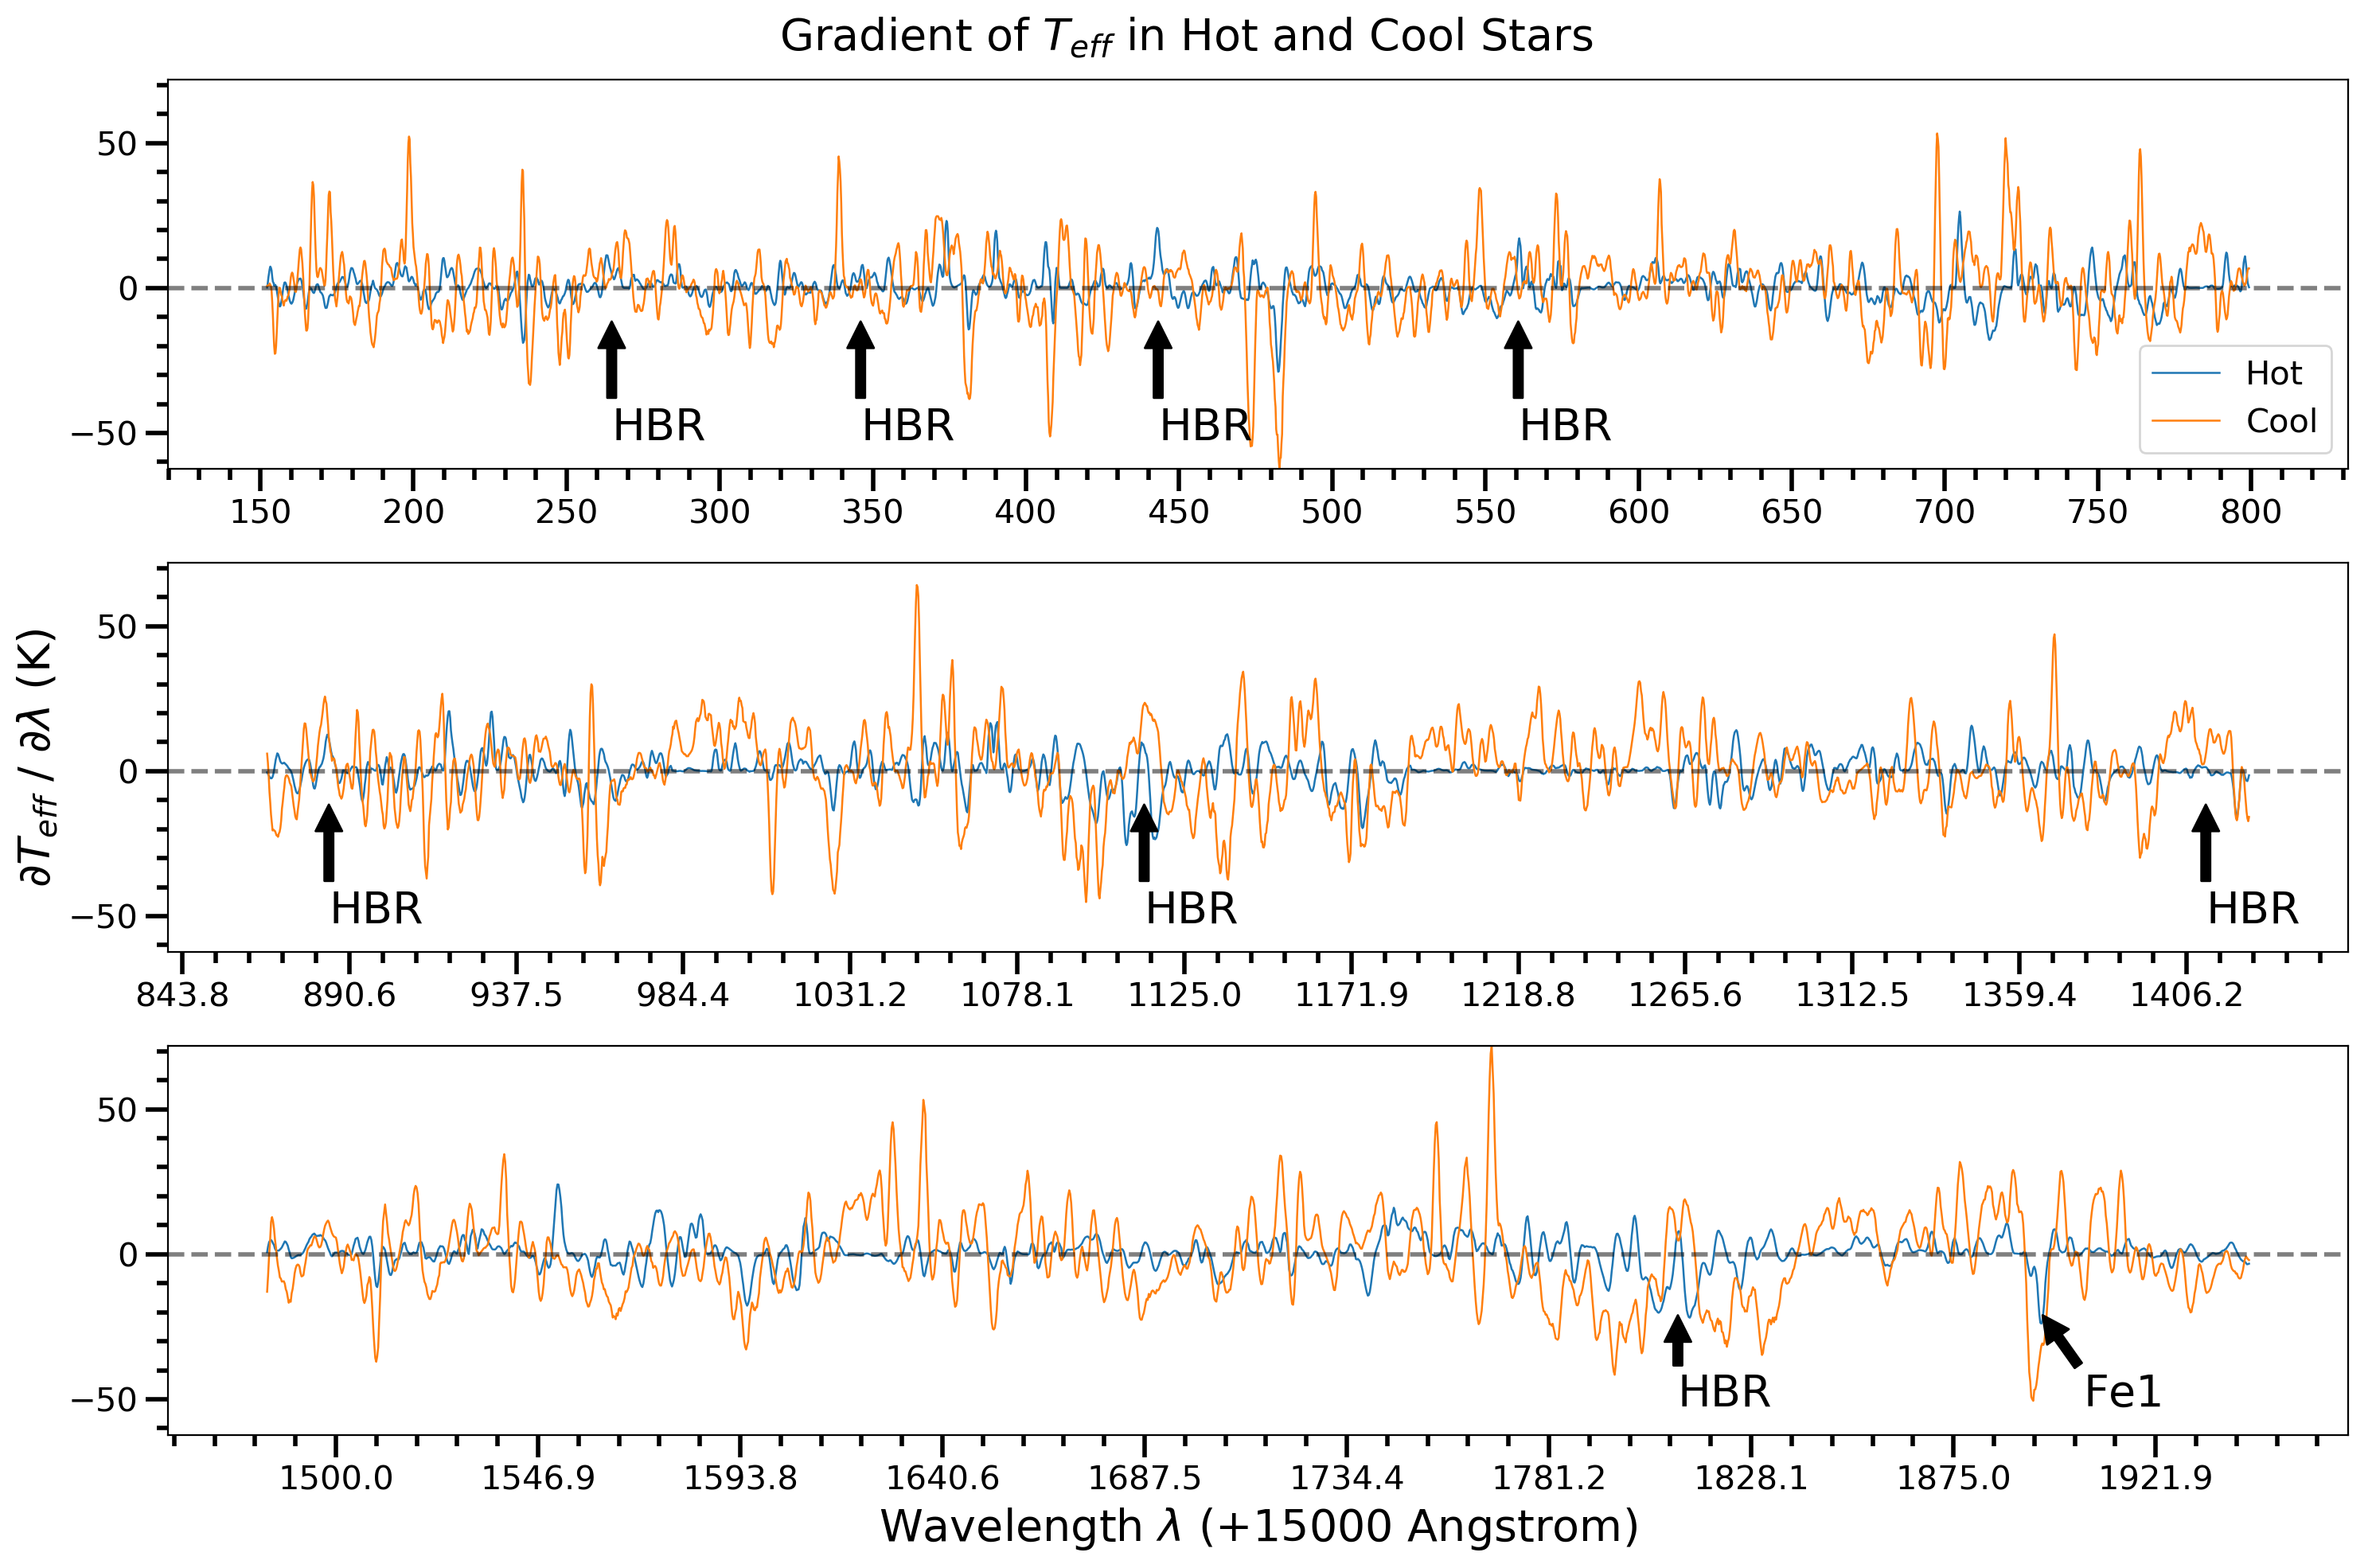

In [19]:
%matplotlib inline
import pylab as plt
import matplotlib.ticker as ticker
from astroNN.apogee.chips import wavelength_solution, chips_split

plt.rc("font", **{"family": "serif", "weight": "medium", "size": 20})

lambda_blue, lambda_green, lambda_red = wavelength_solution(dr=14)

lambda_blue -= 15000
lambda_green -= 15000
lambda_red -= 15000

nn_neuron = 0
target_name = "T_{eff}"

fig = plt.figure(figsize=(15, 10), dpi=200)
hot_jac_b, hot_jac_g, hot_jacc_r = chips_split(hot_jac, dr=14)
cool_jac_b, cool_jac_g, cool_jac_r = chips_split(cool_jac, dr=14)

min_jacpoint = np.min([np.min(hot_jac[nn_neuron]), np.min(cool_jac[nn_neuron])])
max_jacpoint = np.max([np.max(hot_jac[nn_neuron]), np.max(cool_jac[nn_neuron])])

fig.suptitle(f"Gradient of ${target_name}$ in Hot and Cool Stars", fontsize=20)
ax1 = fig.add_subplot(311)
ax1.plot(lambda_blue, hot_jac_b[nn_neuron], linewidth=1.5, label="Hot")
ax1.plot(lambda_blue, cool_jac_b[nn_neuron], linewidth=1.5, label="Cool")
ax1.set_ylim((min_jacpoint, max_jacpoint))

ax2 = fig.add_subplot(312)
ax2.set_ylabel(
    r"$\partial$" + f"${target_name}$" + " / " + r"$\partial\lambda$ (K)", fontsize=20
)
ax2.plot(lambda_green, hot_jac_g[nn_neuron], linewidth=1.5, label="Hot")
ax2.plot(lambda_green, cool_jac_g[nn_neuron], linewidth=1.5, label="Cool")
ax2.set_ylim((min_jacpoint, max_jacpoint))

ax3 = fig.add_subplot(313)
ax3.plot(lambda_red, hot_jacc_r[nn_neuron], linewidth=1.5, label="Hot")
ax3.plot(lambda_red, cool_jac_r[nn_neuron], linewidth=1.5, label="Cool")
ax3.set_ylim((min_jacpoint, max_jacpoint))

ax1.tick_params(labelsize=15, width=2, length=10, which="major")
ax1.tick_params(width=2, length=5, which="minor")
ax2.tick_params(labelsize=15, width=2, length=10, which="major")
ax2.tick_params(width=2, length=5, which="minor")
ax3.tick_params(labelsize=15, width=2, length=10, which="major")
ax3.tick_params(width=2, length=5, which="minor")
leg = ax1.legend(loc="best", fontsize=15)
ax3.set_xlabel(r"Wavelength $\lambda$ (+15000 Angstrom)", fontsize=20)

ax1.axhline(0, ls="--", c="k", lw=1, alpha=0.5)
ax2.axhline(0, ls="--", c="k", lw=1, alpha=0.5)
ax3.axhline(0, ls="--", c="k", lw=1, alpha=0.5)
for legobj in leg.legendHandles:
    legobj.set_linewidth(3.0)

for HBR_blue_line in HBR_blue_lines:
    ax1.annotate(
        "HBR",
        xy=(HBR_blue_line, -10),
        xytext=(HBR_blue_line, min_jacpoint + 10),
        arrowprops=dict(facecolor="black", shrink=0.05),
        fontsize=20,
    )

for HBR_green_line in HBR_green_lines:
    ax2.annotate(
        "HBR",
        xy=(HBR_green_line, -10),
        xytext=(HBR_green_line, min_jacpoint + 10),
        arrowprops=dict(facecolor="black", shrink=0.05),
        fontsize=20,
    )

for HBR_red_line in HBR_red_lines:
    ax3.annotate(
        "HBR",
        xy=(HBR_red_line, -20),
        xytext=(HBR_red_line, min_jacpoint + 10),
        arrowprops=dict(facecolor="black", shrink=0.05),
        fontsize=20,
    )

ax3.annotate(
    "FeI",
    xy=(1895.183, -20),
    xytext=(1895.183 + 10.0, min_jacpoint + 10),
    arrowprops=dict(facecolor="black", shrink=0.05),
    fontsize=20,
)

tick_spacing = 75
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing / 1.5))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing / 1.6))
ax3.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing / 1.6))
ax1.minorticks_on()
ax2.minorticks_on()
ax3.minorticks_on()
plt.tight_layout(rect=[0, 0.00, 1, 0.96])

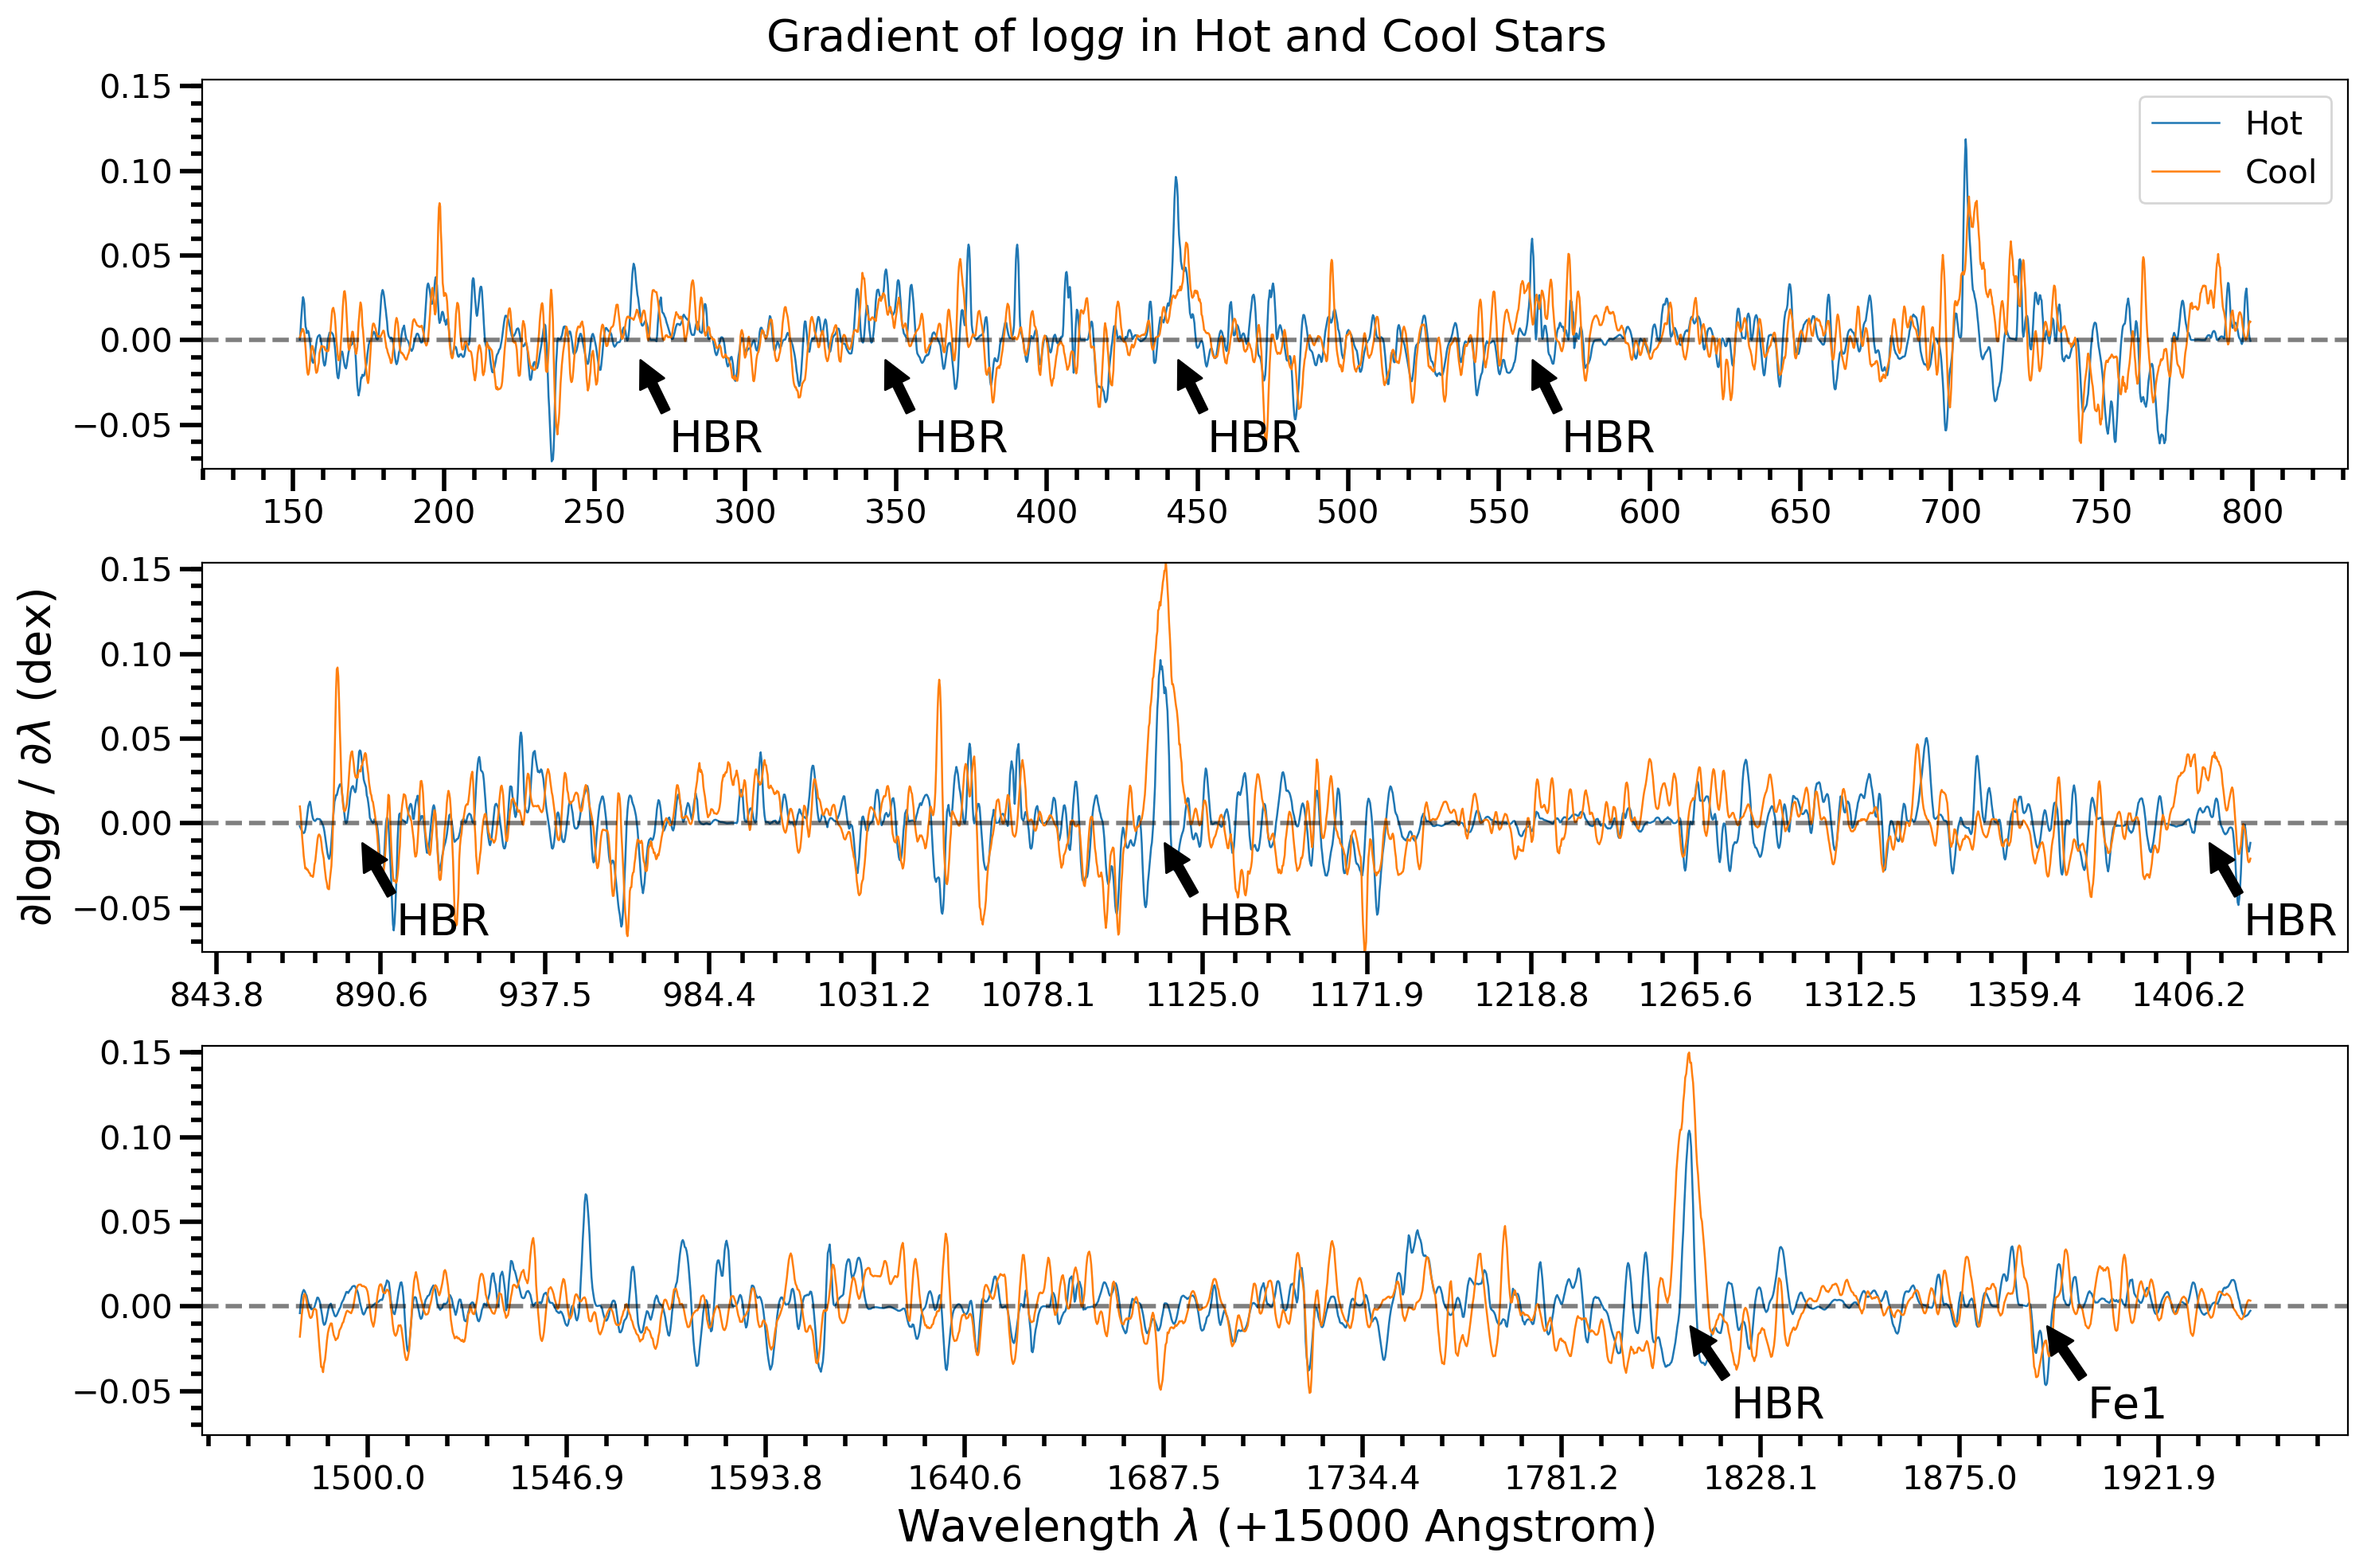

In [20]:
%matplotlib inline
import pylab as plt
import matplotlib.ticker as ticker
from astroNN.apogee.chips import wavelength_solution, chips_split

plt.rc("font", **{"family": "serif", "weight": "medium", "size": 20})

lambda_blue, lambda_green, lambda_red = wavelength_solution(dr=14)

lambda_blue -= 15000
lambda_green -= 15000
lambda_red -= 15000

nn_neuron = 1
target_name = "\log{g}"

fig = plt.figure(figsize=(15, 10), dpi=200)
hot_jac_b, hot_jac_g, hot_jacc_r = chips_split(hot_jac, dr=14)
cool_jac_b, cool_jac_g, cool_jac_r = chips_split(cool_jac, dr=14)

min_jacpoint = np.min([np.min(cool_jac[nn_neuron]), np.min(hot_jac[nn_neuron])])
max_jacpoint = np.max([np.max(cool_jac[nn_neuron]), np.max(hot_jac[nn_neuron])])

fig.suptitle(f"Gradient of ${target_name}$ in Hot and Cool Stars", fontsize=20)
ax1 = fig.add_subplot(311)
ax1.plot(lambda_blue, hot_jac_b[nn_neuron], linewidth=1.5, label="Hot")
ax1.plot(lambda_blue, cool_jac_b[nn_neuron], linewidth=1.5, label="Cool")
ax1.set_ylim((min_jacpoint, max_jacpoint))

ax2 = fig.add_subplot(312)
ax2.set_ylabel(
    r"$\partial$" + f"${target_name}$" + " / " + r"$\partial\lambda$ (dex)", fontsize=20
)
ax2.plot(lambda_green, hot_jac_g[nn_neuron], linewidth=1.5, label="Hot")
ax2.plot(lambda_green, cool_jac_g[nn_neuron], linewidth=1.5, label="Cool")
ax2.set_ylim((min_jacpoint, max_jacpoint))

ax3 = fig.add_subplot(313)
ax3.plot(lambda_red, hot_jacc_r[nn_neuron], linewidth=1.5, label="Hot")
ax3.plot(lambda_red, cool_jac_r[nn_neuron], linewidth=1.5, label="Cool")
ax3.set_ylim((min_jacpoint, max_jacpoint))

ax1.tick_params(labelsize=15, width=2, length=10, which="major")
ax1.tick_params(width=2, length=5, which="minor")
ax2.tick_params(labelsize=15, width=2, length=10, which="major")
ax2.tick_params(width=2, length=5, which="minor")
ax3.tick_params(labelsize=15, width=2, length=10, which="major")
ax3.tick_params(width=2, length=5, which="minor")
leg = ax1.legend(loc="best", fontsize=15)
ax3.set_xlabel(r"Wavelength $\lambda$ (+15000 Angstrom)", fontsize=20)

ax1.axhline(0, ls="--", c="k", lw=1, alpha=0.5)
ax2.axhline(0, ls="--", c="k", lw=1, alpha=0.5)
ax3.axhline(0, ls="--", c="k", lw=1, alpha=0.5)
for legobj in leg.legendHandles:
    legobj.set_linewidth(3.0)

for HBR_blue_line in HBR_blue_lines:
    ax1.annotate(
        "HBR",
        xy=(HBR_blue_line, -0.01),
        xytext=(HBR_blue_line + 10.0, min_jacpoint + 0.01),
        arrowprops=dict(facecolor="black", shrink=0.05),
        fontsize=20,
    )

for HBR_green_line in HBR_green_lines:
    ax2.annotate(
        "HBR",
        xy=(HBR_green_line, -0.01),
        xytext=(HBR_green_line + 10.0, min_jacpoint + 0.01),
        arrowprops=dict(facecolor="black", shrink=0.05),
        fontsize=20,
    )

for HBR_red_line in HBR_red_lines:
    ax3.annotate(
        "HBR",
        xy=(HBR_red_line, -0.01),
        xytext=(HBR_red_line + 10.0, min_jacpoint + 0.01),
        arrowprops=dict(facecolor="black", shrink=0.05),
        fontsize=20,
    )

ax3.annotate(
    "FeI",
    xy=(1895.183, -0.01),
    xytext=(1895.183 + 10.0, min_jacpoint + 0.01),
    arrowprops=dict(facecolor="black", shrink=0.05),
    fontsize=20,
)

tick_spacing = 75
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing / 1.5))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing / 1.6))
ax3.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing / 1.6))
ax1.minorticks_on()
ax2.minorticks_on()
ax3.minorticks_on()
plt.tight_layout(rect=[0, 0.00, 1, 0.96])

In [46]:
%matplotlib inline
import pylab as plt
import matplotlib.ticker as ticker
from astroNN.apogee.chips import wavelength_solution, chips_split
from astroNN.apogee import aspcap_mask

plt.rc("font", **{"family": "serif", "weight": "medium", "size": 20})

lambda_blue, lambda_green, lambda_red = wavelength_solution(dr=14)

lambda_blue -= 15000
lambda_green -= 15000
lambda_red -= 15000

for nn_neuron in range(2, 22):
    tname = bcnn.targetname[nn_neuron].replace("/H]", "").replace("[", "")
    targetname = bcnn.targetname[nn_neuron]

    fig = plt.figure(figsize=(15, 10), dpi=100)
    hot_jac_b, hot_jac_g, hot_jacc_r = chips_split(hot_jac, dr=14)
    cool_jac_b, cool_jac_g, cool_jac_r = chips_split(cool_jac, dr=14)
    c1_mask_b, c1_mask_g, c1_mask_r = chips_split(aspcap_mask(f"{tname}", dr=14), dr=14)

    min_jacpoint = -np.max([np.abs(cool_jac[nn_neuron]), np.abs(hot_jac[nn_neuron])])
    max_jacpoint = np.max([np.abs(cool_jac[nn_neuron]), np.abs(hot_jac[nn_neuron])])

    fig.suptitle(f"Gradient of {targetname} in Hot and Cool Stars", fontsize=20)
    ax1 = fig.add_subplot(311)
    ax1.fill_between(lambda_blue, -10, 10, where=c1_mask_b[0], alpha=0.3, color="g")
    ax1.plot(lambda_blue, hot_jac_b[nn_neuron], linewidth=1.5, label="Hot")
    ax1.plot(lambda_blue, cool_jac_b[nn_neuron], linewidth=1.5, label="Cool")
    ax1.set_ylim((min_jacpoint, max_jacpoint))

    ax2 = fig.add_subplot(312)
    ax2.fill_between(lambda_green, -10, 10, where=c1_mask_g[0], alpha=0.3, color="g")
    ax2.set_ylabel(
        r"$\partial$" + f"{targetname}" + " / " + r"$\partial\lambda$ (dex)",
        fontsize=20,
    )
    ax2.plot(lambda_green, hot_jac_g[nn_neuron], linewidth=1.5, label="Hot")
    ax2.plot(lambda_green, cool_jac_g[nn_neuron], linewidth=1.5, label="Cool")
    ax2.set_ylim((min_jacpoint, max_jacpoint))

    ax3 = fig.add_subplot(313)
    ax3.fill_between(lambda_red, -10, 10, where=c1_mask_r[0], alpha=0.3, color="g")
    ax3.plot(lambda_red, hot_jacc_r[nn_neuron], linewidth=1.5, label="Hot")
    ax3.plot(lambda_red, cool_jac_r[nn_neuron], linewidth=1.5, label="Cool")
    ax3.set_ylim((min_jacpoint, max_jacpoint))

    ax1.tick_params(labelsize=15, width=2, length=10, which="major")
    ax1.tick_params(width=2, length=5, which="minor")
    ax2.tick_params(labelsize=15, width=2, length=10, which="major")
    ax2.tick_params(width=2, length=5, which="minor")
    ax3.tick_params(labelsize=15, width=2, length=10, which="major")
    ax3.tick_params(width=2, length=5, which="minor")
    leg = ax1.legend(loc="best", fontsize=15)
    ax3.set_xlabel(r"Wavelength $\lambda$ (+15000 Angstrom)", fontsize=20)

    ax1.axhline(0, ls="--", c="k", lw=1, alpha=0.5)
    ax2.axhline(0, ls="--", c="k", lw=1, alpha=0.5)
    ax3.axhline(0, ls="--", c="k", lw=1, alpha=0.5)
    for legobj in leg.legendHandles:
        legobj.set_linewidth(3.0)

    for HBR_blue_line in HBR_blue_lines:
        ax1.annotate(
            "HBR",
            xy=(HBR_blue_line, -0.01),
            xytext=(HBR_blue_line, min_jacpoint + 0.01),
            arrowprops=dict(facecolor="black", shrink=0.05),
            fontsize=20,
        )

    for HBR_green_line in HBR_green_lines:
        ax2.annotate(
            "HBR",
            xy=(HBR_green_line, -0.01),
            xytext=(HBR_green_line, min_jacpoint + 0.01),
            arrowprops=dict(facecolor="black", shrink=0.05),
            fontsize=20,
        )

    for HBR_red_line in HBR_red_lines:
        ax3.annotate(
            "HBR",
            xy=(HBR_red_line, -0.05),
            xytext=(HBR_red_line, min_jacpoint + 0.01),
            arrowprops=dict(facecolor="black", shrink=0.05),
            fontsize=20,
        )

    ax3.annotate(
        "FeI",
        xy=(1895.183, -0.05),
        xytext=(1895.183 + 10.0, min_jacpoint + 0.01),
        arrowprops=dict(facecolor="black", shrink=0.05),
        fontsize=20,
    )

    tick_spacing = 75
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing / 1.5))
    ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing / 1.6))
    ax3.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing / 1.6))
    ax1.minorticks_on()
    ax2.minorticks_on()
    ax3.minorticks_on()
    plt.tight_layout(rect=[0, 0.00, 1, 0.96])
    plt.savefig(f"hot_cool_jac\\jac_{tname}_h.pdf")
    plt.clf()
    plt.cla()
    plt.close()